Lineamientos limpieza de texto crudo:

	1. No permitir palabras con más de una letra en mayúscula (Eliminarlas).
	2. Reemplazar letras con tildes por sus homólogos sin ellas.
	3. Reemplazar caracteres especiales por espacios, ej: ["\t", "\n", "\u200b"]
	4. Permitir sólo letras del alfabeto español (Letras de la Aa a la Zz incluyendo la Ññ), reemplazar las demás por
	   espacios en blanco.
	5. Reemplazar cualquier símbolo (@, !, ?, etc...) por espacio en blanco.
	6. Reemplazar stop words por espacio en blanco.
	7. Sólo permitir palabras con MÁS de 3 caracteres de longitud después de haber realizado la limpieza.
	8. Finalmente todas las palabras deben estar en minúscula.
	9. sin palabras repetidas

1. Borrar iniciales con mas de dos mayúsculas--
2. pasar todo a minuscula --
3. quitar tildes a las vocales --
4. quitar los saltos de linea, tabulación y el caracter \u200b --
5. Sólo permitir las letras según la regex de los lineamientos
6. quitar caracteres especiales
7. y por ultimo las stop words

### importa librerias


In [12]:
#from google.colab import drive
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics as stat
from  scipy.stats import chi2_contingency
import nltk
from scipy import stats 
from nltk.corpus import stopwords
import os
#drive.mount('/content/drive')
#se llamanan todas las direcciones de las bases de datos 
dir = ["Aeropuerto.txt","Agricultura.txt","Alan_Turing.txt","Antiguo_Egipto.txt",
       "Arte.txt","Asia.txt","Babilonia_(ciudad).txt","Biblia.txt","Biodiversidad.txt","Capitalismo.txt",
       "Ciencia.txt","Colombia.txt","Consumo.txt","Cristianismo.txt","Cristo.txt","Cultura.txt",
       "Democracia.txt","Diccionario.txt","Divina_comedia.txt","Ecologismo.txt","Energ_C3_ADa_nuclear.txt",
       "Enrique_VIII_de_Inglaterra.txt","Escritura.txt","Est_C3_A9tica.txt","Estado.txt","Estados_Unidos.txt",
       "Europa.txt","Filosof_C3_ADa.txt","Finanzas.txt","Fruta.txt","Gabriel_Garc_C3_ADa_M_C3_A1rquez.txt",
       "Gastronom_C3_ADa_de_M_C3_A9xico.txt","George_Patton.txt","Grecia.txt","Guerra_Fr_C3_ADa.txt",
       "Henry_Ford.txt","Holocausto.txt","Homo_sapiens.txt","Inteligencia_artificial.txt",
       "Italia.txt","Jorge_Isaacs.txt","Juda_C3_ADsmo.txt","Juglar.txt","Julio_Garavito.txt","Liberalismo.txt",
       "Libro.txt", "Ludwig_van_Beethoven.txt","Nevado_del_Ruiz.txt","Nikola_Tesla.txt","Odisea.txt",
       "Organizaci_C3_B3n_de_las_Naciones_Unidas.txt","Per_C3_ADodo_helen_C3_ADstico.txt","Pizza.txt",
       "Pueblos_germ_C3_A1nicos.txt","Real_Academia_Espa_C3_B1ola.txt","Reino_Unido.txt",
       "Revoluci_C3_B3n_Industrial.txt", "Rueda.txt","Salsa_(g_C3_A9nero_musical).txt","Saxof_C3_B3n.txt",
       "Segunda_Guerra_Mundial.txt","Sublime.txt","Thomas_Alva_Edison.txt","Valle.txt","_C3_81frica.txt"]
with open("data_file.txt", "w") as new_file:
  for name in dir:
    with open(name) as f:
      for line in f:
          new_file.write(line)
with open("data_file.txt", "r") as T_file:
  data = T_file.read()

## estas variables se usan para el anális
data_analitics = data


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2476760029.py, line 30)

## limpieza de datos


### pasos

1. Borrar iniciales con mas de dos mayúsculas
2. pasar todo a minuscula 
3. quitar tildes a las vocales

In [ ]:
print("cantidad de simbolos:",len(re.split(" ",' '.join(set(data)))),' '.join(set(data)))


cantidad de simbolos: 344 ִ ² ṇ ὁ z D ὕ λ 𐀊 0 = ȟ ć е î ⵔ ò ĭ ‎ / ē ἐ ' ם S à Ν ψ ¯ ã ζ Z 𐀹 . ḗ פ ن α ὰ ή ř é ῖ ç ! 字 & Ε 𐤓 G ز ’ o ח a Κ έ γ ῶ J £ ~ 
 ε Ι ⴼ v ​ ó 巴 > ? á ό O ἅ e 𐤐 ע ˈ ş Ζ ø ῦ ג d Λ â F ὸ s 6 X } π ⋅ Ú 汉 ְ Á ï צ B ō ἡ ‘ א ὐ ά ī ṃ Σ [ )   I Η 𐀀 × ś ֵ ” Α Ἑ – ː K ♭ x 3 ü “ 𒍮 Φ ί i 8 Τ œ Ł N Ä ر ρ ♯ ξ : ἴ 𒉿 _ φ » מ W ë ɾ ― Н ô y { ד Μ Ō 2 羅 а ṣ ἰ κ U L כ ָ ν - º с ¿ ו 𒀀 ý ס μ r ; σ $ b ι ì ¡ ὶ Í ר š č 𐤏 ß ἑ Y í θ ′ « Π p Χ ḥ ⵉ Υ ñ w k þ ^ ַ ב к Έ ל ʔ , β H % V g η 漢 7 л ا ʿ י R | ת ū Β ی ς Å Θ h • о 4 ș נ * f 𒋗 ± ק T đ ¨ Đ ł Γ и ت ö C ο \ 歐 m P Ἐ 1 Ὀ n ה χ l ἱ ê 𒀸 9 ὤ Δ ὖ ° ù è ª τ ω ³ ´ + Ἰ c A M 5 ύ ὴ æ … t ─ " j 洲 ( — û ] ŋ ώ ׁ پ υ u Q ä # ὺ − Т δ ź ῆ ú É ā € ṓ Ο q ð < 𐀯 ּ ש   ὅ Ó ׂ E


'Un aeropuerto es un aeródromo con terminal para el viaje de transporte aéreo en aeronave. Las funciones del aeropuerto son variadas, entre ellas el aterrizaje y despegue de aeronaves, embarque y desembarque de pasajeros, equipaje y mercancía, reabastecimiento de combustible y mantenimiento de aeronaves, así como lugar de estacionamiento para aquellas que no están en servicio. Los aeropuertos sirven para aviación militar, comercial o general.[1]\u200b\n\nLos aeropuertos se dividen en dos partes:\n\nUn aeródromo es un área definida de tierra(que incluye todas sus edificaciones, instalaciones y equipos) destinado total o parcialmente a la llegada, partida o movimiento de aeronaves. Son aeropuertos aquellos aeródromos públicos que cuentan con servicios o intensidad de movimiento aéreo que justifiquen tal denominación. Aquellos aeródromos con vuelos provenientes del o con destino al extranjero, donde se presten servicios de sanidad, aduana, migraciones y otros, se denominan aeródromos o ae

In [ ]:
# se elimina la palabras con mas de 2 letras mayusculas
data = re.sub(r"\w*[A-Z]\w*[A-Z]\w*"," ",data)
# se pasa a minusculas todo el texto
data = data.lower()
# se elimina las tildes 
a,b = 'áéíóúÁÉÍÓÚ','aeiouAEIOU'
trans = str.maketrans(a,b)
data = data.translate(trans)
print(len(re.split(" ",data)))


424925


### paso

4. quitar los saltos de linea, tabulación y el caracter \u200b

In [ ]:
print("cantidad de simbolos:",len(' '.join(set(data)))) # se mira los carateres que tiene la base de datos 
# se limpian los simbolos 
symbols_1  = r"\n|\—|\–|\°|\u200b|\[|]|:|ː|\.|\{|}|\(|\)|\d|\'|,|;|,|!|¡|\?|¿|-|_|\"|\'|#|♯|\$|&|%|/|=|\*|\+|\^|º|<|>|~|«|»|\xa0|\‘|\’ |\“|\”|\||\\|\u200e|\@"
data = re.sub(symbols_1," ",data)
print(len(re.split(" ",data)))
print("cantidad de simbolos:",len(re.split(" ",' '.join(set(data)))),' '.join(set(data)))


cantidad de simbolos: 557
551100
cantidad de simbolos: 223 ῦ ν ت ג ö ² ִ с ו d 𒀀 ý ṇ ὁ â z ס ὸ μ s ο ὕ λ 𐀊 r σ m π ⋅ 歐 ȟ ć 汉 е ְ ï î צ ⵔ b ò n ι ĭ ō ì χ ה ἡ l ἱ ē ὶ ר ἐ ם א ὐ à ά ê š ī ṃ 𒀸 ψ č ¯ ὀ 𐤏 ß ἑ ã ζ н ὤ 𐀹 ḗ ὖ θ ′ ù è פ ن p   ª α ḥ τ ω ὰ ³ ⵉ ´ ñ ή c w ř 𐀀 × ś k ῖ ֵ þ ç ύ ַ ὴ æ 字 ב ♭ 𐤓 … к x ל t ü 𒍮 ʔ ─ ί β j 洲 ز g i ’ η o ח 漢 œ a л û έ ر γ ρ ῶ ŋ ώ ξ ׁ پ ا £ ʿ י υ u ἴ ä ε 𒉿 φ т ὺ ת ⴼ − ū מ ی ς ë h δ • ɾ ― о v ô y ź 巴 ῆ ș נ ד f ā € ṓ ό q 𒋗 å ± 羅 ð а ἅ 𐀯 ק e ּ 𐤐 ש ע ὅ ṣ ¨ ˈ đ ἰ κ ş כ ł ø ָ и ׂ


In [ ]:
#simbols = []
#for i,L in enumerate(other_simbol):
#  if i < (len(other_simbol)-1):
#    simbols.append("\\"+L)
#    simbols.append('|')
#  elif i == (len(other_simbol)-1):
#    simbols.append(L)

#remote_simbol = r' '.join(simbols)
remote_simbol = r"\ç|\к|\ὺ|\ί|\ō|\ʔ|\כ|\π|\ی|\î|\𐀹|\ύ|\β|\ὖ|\τ|\ׁ |\ت|\ἴ|\ē|\ή|\š|\ŋ|\ב|\ὅ|\ו|\θ|\κ|\ḗ|\ῖ|\𐀊|\ł|\ְ|\û|\…|\â|\ψ|\ώ|\𐀀|\ὰ|\ū|\י|\ṇ|\н|\ï|\ὀ|\ṓ|\έ|\ʿ|\ş|\ⵔ|\’|\ř|\ὁ|\л|\ς|\ر|\ć|\ἐ|\ä|\λ|\ο|\پ|\ּ|\𐀯|\ś|\ה|\ἑ|\מ\|\ָ\|א|\\ֵ|\ü|\ִ|\¨|\\ַ|\σ|\ε|\ι|\洲|\羅|\ד|\о|\ἅ |\─|\צ|\þ|\ĭ|\ý|\ˈ|\è|\ز|\ê|\γ|\ό|\ù|\ø|\œ|\ש\|ע\ |ר|\ã|\ô|\ⴼ|\ī|\―|\ì|\ω|\đ|\à|\נ|\č|\ῦ|\ὴ|\ź|\ا|\歐|\ζ|\ג|\т|\ת|\ρ|\δ|\ن|\ṃ|\´|\φ|\ά|\ἱ|\\|\ὐ|\μ|\פ|\ὕ|\ö|\χ|\ḥ|\ß|\ὶ|\ș|\ȟ|\ἰ|\ξ|\å|\ῆ|\ò|\ׂ|\е|\ð|\ā|\η|\ל|\ɾ|\и|\æ|\ⵉ|\ë|\ם\|ק\|ח\|ס|\巴|α"
print(remote_simbol)
data = re.sub(remote_simbol," ",data)
print("simbolos:",sorted(re.split(" ",' '.join(set(data)))))
print("cantidad de palabras:",len(re.split(" ",data)))


\ç|\к|\ὺ|\ί|\ō|\ʔ|\כ|\π|\ی|\î|\𐀹|\ύ|\β|\ὖ|\τ|\ׁ |\ت|\ἴ|\ē|\ή|\š|\ŋ|\ב|\ὅ|\ו|\θ|\κ|\ḗ|\ῖ|\𐀊|\ł|\ְ|\û|\…|\â|\ψ|\ώ|\𐀀|\ὰ|\ū|\י|\ṇ|\н|\ï|\ὀ|\ṓ|\έ|\ʿ|\ş|\ⵔ|\’|\ř|\ὁ|\л|\ς|\ر|\ć|\ἐ|\ä|\λ|\ο|\پ|\ּ|\𐀯|\ś|\ה|\ἑ|\מ\|\ָ\|א|\\ֵ|\ü|\ִ|\¨|\\ַ|\σ|\ε|\ι|\洲|\羅|\ד|\о|\ἅ |\─|\צ|\þ|\ĭ|\ý|\ˈ|\è|\ز|\ê|\γ|\ό|\ù|\ø|\œ|\ש\|ע\ |ר|\ã|\ô|\ⴼ|\ī|\―|\ì|\ω|\đ|\à|\נ|\č|\ῦ|\ὴ|\ź|\ا|\歐|\ζ|\ג|\т|\ת|\ρ|\δ|\ن|\ṃ|\´|\φ|\ά|\ἱ|\\|\ὐ|\μ|\פ|\ὕ|\ö|\χ|\ḥ|\ß|\ὶ|\ș|\ȟ|\ἰ|\ξ|\å|\ῆ|\ò|\ׂ|\е|\ð|\ā|\η|\ל|\ɾ|\и|\æ|\ⵉ|\ë|\ם\|ק\|ח\|ס|\巴|α
simbolos: ['', '', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '£', 'ª', '¯', '±', '²', '³', '×', 'ñ', 'ν', 'υ', 'а', 'с', 'ֵ', 'ַ', 'ָ', 'ׁ', 'א', 'ח', 'ם', 'מ', 'ס', 'ע', 'ק', 'ש', 'ṣ', 'ἅ', 'ἡ', 'ὤ', 'ὸ', 'ῶ', '•', '′', '€', '−', '⋅', '♭', '字', '汉', '漢', '𐤏', '𐤐', '𐤓', '𒀀', '𒀸', '𒉿', '𒋗', '𒍮']
cantidad de palabras: 552704


### paso

5. se elimina palabras repetidas

In [ ]:
# se busca las palabras repetidas y se eliminan
# la funcion debe recibir una lista para esto se recomienda usar la librería re
def remove_repeated_words(text):
    ulist = []
    # se agregan las palbras si estas no estan en la lista
    [ulist.append(word) for word in text if word not in ulist]
    return ' '.join(ulist)
# funcion que remueve palabras menores a 4 letras
def remove_words(text):
  list_data = []
  for word in text:
    if len(word)>3:
      list_data.append(word)
  return ' '.join(list_data)

data = remove_repeated_words(re.split(" ", data))
print(len(re.split(" ",data)))
data = remove_words(re.split(" ",data))
print(len(re.split(" ",data)))
data

33183
32539


'aeropuerto aerodromo terminal para viaje transporte aereo aeronave funciones variadas entre ellas aterrizaje despegue aeronaves embarque desembarque pasajeros equipaje mercancia reabastecimiento combustible mantenimiento como lugar estacionamiento aquellas estan servicio aeropuertos sirven aviacion militar comercial general dividen partes area definida tierra incluye todas edificaciones instalaciones equipos destinado total parcialmente llegada partida movimiento aquellos aerodromos publicos cuentan servicios intensidad justifiquen denominacion vuelos provenientes destino extranjero donde presten sanidad aduana migraciones otros denominan internacionales helipuertos definen destinados utilizados solamente helicopteros tanto aplicables disposiciones relativas clasificacion procedimientos autorizacion vigente hidroaviones aterrizan superficies agua tales lagos forma necesitan tener zonas libres obstaculos aguas tranquilas tambien existen anfibios amerizan portaaviones ejemplo base aerea

### pasos

6. Sólo permitir las letras según la regex de los lineamientos
7. quitar caracteres especiales

In [ ]:
# se elimina las palabras con menos de 3 letras 
def remove_words(text):
  list_data = []
  for word in text:
    if len(word)>3:
      list_data.append(word)
  return ' '.join(list_data)
data = remove_words(re.split(" ", data))

# compara las palabras de txt y delate_words, si la palabra se encuentra en txt 
# la ellimina 
def delate_stopwords(txt, delate_words):
    return ' '.join([word for word in txt.split(' ') if word not in delate_words])


In [ ]:
# se elimina las palabras con caracteres nos permitidos 
#data = delate_words_accents(re.split(" ",data),other_simbol)
data = ' '.join(re.findall("\w*[a-zñ]\w*[a-zñ]\w*",data))
print("cantidad de palabras:",len(re.split(" ",data)))
print("\n letras del abecedario:",len(re.split(" ",' '.join(set(data)))),' '.join(set(data)))
data

cantidad de palabras: 32539

 letras del abecedario: 29 h d v x y t z s f j g i o r   p m q a ñ e b u n l c w k


'aeropuerto aerodromo terminal para viaje transporte aereo aeronave funciones variadas entre ellas aterrizaje despegue aeronaves embarque desembarque pasajeros equipaje mercancia reabastecimiento combustible mantenimiento como lugar estacionamiento aquellas estan servicio aeropuertos sirven aviacion militar comercial general dividen partes area definida tierra incluye todas edificaciones instalaciones equipos destinado total parcialmente llegada partida movimiento aquellos aerodromos publicos cuentan servicios intensidad justifiquen denominacion vuelos provenientes destino extranjero donde presten sanidad aduana migraciones otros denominan internacionales helipuertos definen destinados utilizados solamente helicopteros tanto aplicables disposiciones relativas clasificacion procedimientos autorizacion vigente hidroaviones aterrizan superficies agua tales lagos forma necesitan tener zonas libres obstaculos aguas tranquilas tambien existen anfibios amerizan portaaviones ejemplo base aerea

### paso

8. se elimina stop word

In [ ]:
nltk.download('stopwords')
print("\n-------------------------------------------------------------------\n")
stop_words = stopwords.words('spanish')
#stop_words = ' '.join(stop_words)
#stop_words = stop_words.translate(trans)
#print(stop_words.split(" "))# se elimina las stopwords 
def delate_stopwords(txt, stopwords):
    return ' '.join([word for word in txt.split(' ') if word not in stopwords])
data = delate_stopwords(data,stop_words)
print(len(re.split(" ",data)))


data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



-------------------------------------------------------------------

32430


'aeropuerto aerodromo terminal viaje transporte aereo aeronave funciones variadas aterrizaje despegue aeronaves embarque desembarque pasajeros equipaje mercancia reabastecimiento combustible mantenimiento lugar estacionamiento aquellas estan servicio aeropuertos sirven aviacion militar comercial general dividen partes area definida tierra incluye todas edificaciones instalaciones equipos destinado total parcialmente llegada partida movimiento aquellos aerodromos publicos cuentan servicios intensidad justifiquen denominacion vuelos provenientes destino extranjero presten sanidad aduana migraciones denominan internacionales helipuertos definen destinados utilizados solamente helicopteros aplicables disposiciones relativas clasificacion procedimientos autorizacion vigente hidroaviones aterrizan superficies agua tales lagos forma necesitan tener zonas libres obstaculos aguas tranquilas tambien existen anfibios amerizan portaaviones ejemplo base aerea helipuerto cataratas niagara ontario ca

In [ ]:
# se busca los simbolos diferentes a [a-z]
new_data = ' '.join(set(data))
print(len(re.split(" ",new_data)))
print("simbolos:",re.split(" ",new_data))
# se oldena las letras
letters_abc = sorted(re.findall(r"[a-zñ]",new_data))
print(letters_abc)

# se buscan las palabras que tiene acentos  para ser eliminadas 
other_simbol = []
for i in re.split(" ",new_data):
  if i not in letters_abc:
    other_simbol.append(i) 
print("simbolos no permitidos",other_simbol)
#---------------------------------------------------------------------------------------------

print("cantidad de palabras:",len(re.split(" ",data)))

29
simbolos: ['h', 'd', 'v', 'x', 'y', 't', 'z', 's', 'f', 'j', 'g', 'i', 'o', 'r', '', '', 'p', 'm', 'q', 'a', 'ñ', 'e', 'b', 'u', 'n', 'l', 'c', 'w', 'k']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ñ']
simbolos no permitidos ['', '']
cantidad de palabras: 32430


In [ ]:
# se guarda la base de datos en un txt
with open("/content/drive/MyDrive/reto/final_data_cleaned.txt", "w") as file_clear:
  file_clear.write(data)

# Informe de BI

## **2. Muestreo de datos:**
* Realizar un muestreo de cada una de las diferentes fuentes de información obtenidas en la recolección de la búsqueda de las palabra



> Las siguientes graficas muestra la cantidad de palabras por cada base de datos, como se puede ver la cantidad de palabras por base de datos tiene una asimetría hacia la derecha, con una media de 6505.03 palabras y una mediana de 4912 palabras.







[3061, 5898, 3813, 6397, 11228, 5693, 4183, 6639, 3062, 6724, 5299, 15990, 1559, 10010, 3851, 7499, 8474, 1377, 3667, 2979, 11256, 4912, 2540, 1382, 3236, 13096, 6608, 13491, 1461, 1807, 7851, 11767, 3419, 14375, 14456, 4636, 23725, 5573, 3509, 12825, 1083, 3791, 4603, 1175, 2131, 4537, 8276, 3603, 10644, 3140, 6506, 6945, 2328, 5938, 2237, 14942, 8000, 2845, 4843, 5279, 26849, 3964, 2898, 1385, 5557]


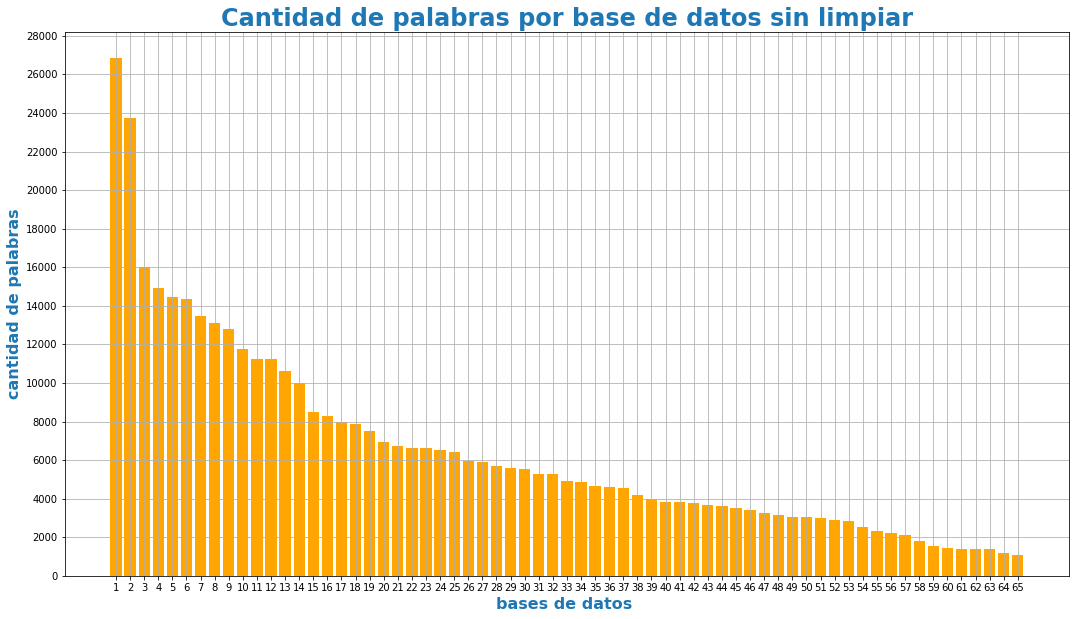

In [ ]:
# se leen todo los archivos y se empaquetan en uno solo 
#se agrega todos los datos a una solo archivo 
list_string = []
for name_dir in dir:
  with open("/content/drive/MyDrive/reto/raw_texts/"+name_dir,"r") as file:
    data1 = file.read()
    #se agrega los datos al vector
    list_string.append(len(re.split(" ",data1)))
print(list_string)
nums = []
for i in range(1,66):
  nums.append(str(i))

fig, ax = plt.subplots(figsize = (18,10))
#plt.bar(nums,quantity_word)
plt.bar(nums,sorted(list_string,reverse= True),color="#ffa602")
ax.set_ylabel("cantidad de palabras", fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("bases de datos ", fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_title('Cantidad de palabras por base de datos sin limpiar', loc = "center", fontdict = {'fontsize':24, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_yticks(range(0,30000,2000))
ax.grid()
plt.show()

No handles with labels found to put in legend.


la media de las palabras de las bases de datos es:  6505.030769230769
la mediana de las palabras de las bases de datos es:  4912


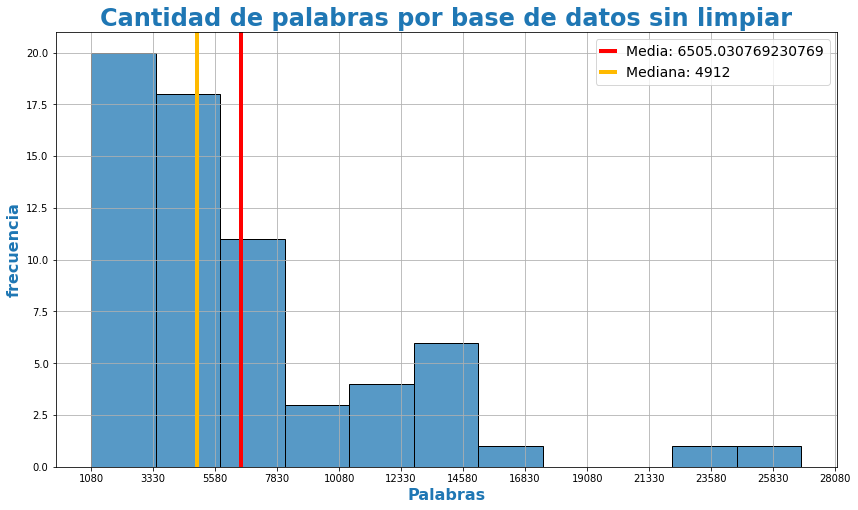

In [ ]:
# se hace un histograma para la bases de datos 
mean_data = stat.mean(list_string)
median_data = stat.median(list_string)

print("la media de las palabras de las bases de datos es: ",mean_data)
print("la mediana de las palabras de las bases de datos es: ",median_data)

fig, ax = plt.subplots(figsize = (14,8))
params = {'legend.fontsize': 9.7,'legend.handlelength': 1}
plt.rcParams.update(params)
plt.legend()
sns.histplot(list_string,multiple="stack",
    palette="light:m_r")
ax.set_title('Cantidad de palabras por base de datos sin limpiar', loc = "center", fontdict = {'fontsize':24, 'fontweight':'bold', 'color':'tab:blue'})
ax.axvline(x=mean_data, color ="red", label = "Media: "+str(mean_data), lw = 4)
ax.axvline(x=median_data, color ="#ffba00", label = "Mediana: "+str(median_data), lw = 4)
ax.grid()
plt.rcParams.update(params)
plt.legend(fontsize = 14)
ax.set_xticks(range(1080,30000,2250))
ax.set_ylabel("frecuencia", fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("Palabras", fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()



## 3. Recolección inicial de datos:
* Realizar la identificación y unificación de las fuentes de información obtenidas en la recolección de la búsqueda de las     palabras.
* Genere un reporte con la información obtenida de la recolección de los datos

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


cantidad de palabras:  422763
cantidad de simbolos:  127750
cantidad de menores a 4 letras:  178682
Cantidad de letras y simbolos:  344
Cantidad de stop words:  182560


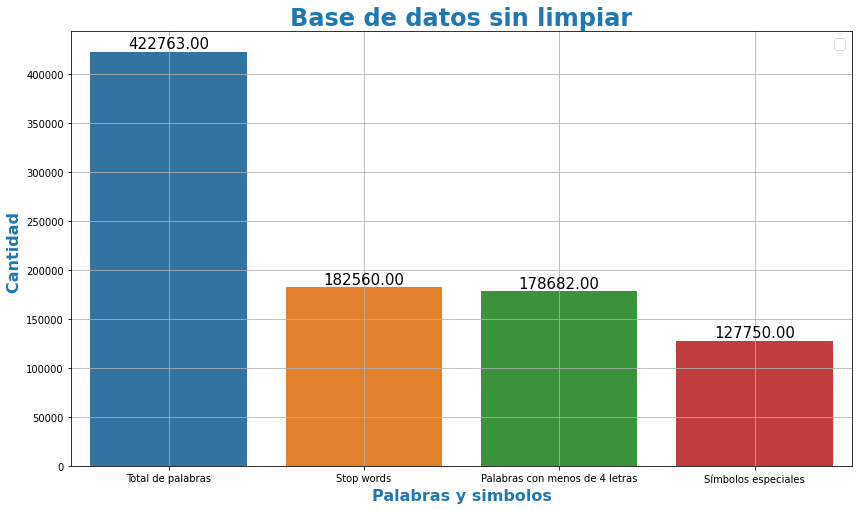

In [ ]:
# se mira la cantidad de datos que se eliminaron
sizes_word = len(re.split(" ",data_analitics))
simbols = r"\n|\—|\–|\°|\u200b|\[|]|:|ː|\.|\{|}|\(|\)|\d|\'|,|;|,|!|¡|\?|¿|-|_|\"|\'|#|♯|\$|&|%|/|=|\*|\+|\^|º|<|>|~|«|»|\xa0|\‘|\’ |\“|\”|\||\\|\u200e|\@|\ç|\к|\ὺ|\ί|\ō|\ʔ|\כ|\π|\ی|\î|\𐀹|\ύ|\β|\ὖ|\τ|\ׁ |\ت|\ἴ|\ē|\ή|\š|\ŋ|\ב|\ὅ|\ו|\θ|\κ|\ḗ|\ῖ|\𐀊|\ł|\ְ|\û|\…|\â|\ψ|\ώ|\𐀀|\ὰ|\ū|\י|\ṇ|\н|\ï|\ὀ|\ṓ|\έ|\ʿ|\ş|\ⵔ|\’|\ř|\ὁ|\л|\ς|\ر|\ć|\ἐ|\ä|\λ|\ο|\پ|\ּ|\𐀯|\ś|\ה|\ἑ|\מ\|\ָ\|א|\\ֵ|\ü|\ִ|\¨|\\ַ|\σ|\ε|\ι|\洲|\羅|\ד|\о|\ἅ |\─|\צ|\þ|\ĭ|\ý|\ˈ|\è|\ز|\ê|\γ|\ό|\ù|\ø|\œ|\ש\|ע\ |ר|\ã|\ô|\ⴼ|\ī|\―|\ì|\ω|\đ|\à|\נ|\č|\ῦ|\ὴ|\ź|\ا|\歐|\ζ|\ג|\т|\ת|\ρ|\δ|\ن|\ṃ|\´|\φ|\ά|\ἱ|\\|\ὐ|\μ|\פ|\ὕ|\ö|\χ|\ḥ|\ß|\ὶ|\ș|\ȟ|\ἰ|\ξ|\å|\ῆ|\ò|\ׂ|\е|\ð|\ā|\η|\ל|\ɾ|\и|\æ|\ⵉ|\ë|\ם\|ק\|ח\|ס|\巴|α"
simbolstoclear = len(re.findall(simbols,data_analitics))
sizes_minor4 = 0
quan_stopwords = 0
for w in re.split(" ",data_analitics):
  if len(w)<4:
    sizes_minor4 += 1
  if w in stop_words:
    quan_stopwords += 1
print("cantidad de palabras: ",sizes_word)
print("cantidad de simbolos: ",simbolstoclear)
print("cantidad de menores a 4 letras: ",sizes_minor4)
simbolsdata = re.split(" ",' '.join(set(data_analitics)))
print("Cantidad de letras y simbolos: ",len(simbolsdata))
print("Cantidad de stop words: ", quan_stopwords)


fig, ax = plt.subplots(figsize = (14,8))
params = {'legend.fontsize': 9.7,'legend.handlelength': 1}
plt.rcParams.update(params)
plt.legend()
sns.barplot(["Total de palabras","Stop words","Palabras con menos de 4 letras","Símbolos especiales"],[sizes_word,quan_stopwords,sizes_minor4,simbolstoclear])
for bar in ax.patches:   
  ax.annotate(format(bar.get_height(), '.2f'),  
                  (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                  size=15, xytext=(0, 8), 
                  textcoords='offset points') 
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_ylabel("Cantidad ", fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("Palabras y simbolos", fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_title('Base de datos sin limpiar', loc = "center", fontdict = {'fontsize':24, 'fontweight':'bold', 'color':'tab:blue'})
plt.rcParams.update(params)
plt.legend(fontsize = 14)
ax.grid()
plt.show()



## 4.Medidas de tendencia central:
* Determinar la media, moda y mediana de las longitudes de caracteres de las palabras disponibles. Adicionalmente puede realizar análisis de tendencia central en otras variables si lo desea.


No handles with labels found to put in legend.


media : 8.502528522972556
mediana : 8.0
moda:  8


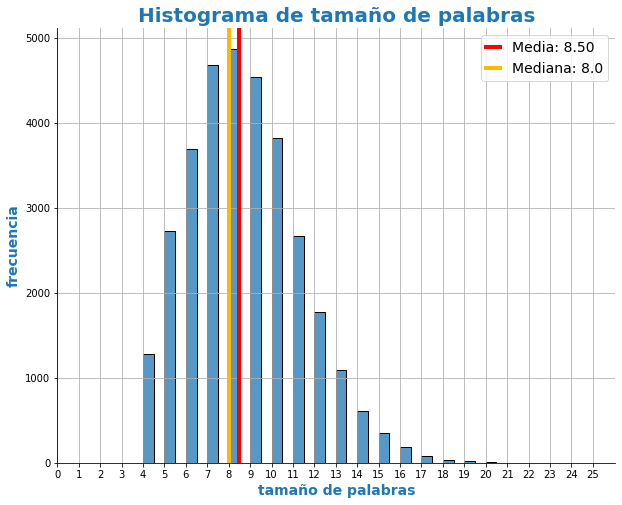

In [ ]:
size_words = []
for w in re.split(" ",data):
  size_words.append(len(w))
# Se calcula la media mediana y modosa 
size_mean = np.mean(size_words)
size_median = np.median(size_words)
size_mode = stat.mode(size_words)

print("media :",size_mean)
print("mediana :",size_median)
print("moda: ",size_mode)
# se hace un histograma para la bases de datos 
fig, ax = plt.subplots(figsize = (10,8))
params = {'legend.fontsize': 9.7,'legend.handlelength': 1}
plt.rcParams.update(params)
plt.legend()
#sns.histplot(list_string,multiple="stack",palette="light:m_r")
sns.despine(fig)
sns.histplot(size_words,binwidth=0.5)
ax.set_title('Histograma de tamaño de palabras', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
ax.axvline(x=size_mean, color ="red", label = "Media: "+str(size_mean)[:4], lw = 4)
ax.axvline(x=size_median, color ="#ffba00", label = "Mediana: "+str(size_median), lw = 4)
ax.grid()
plt.rcParams.update(params)
plt.legend(fontsize = 14)
ax.set_xticks(range(0,26,1))
ax.set_xlabel("tamaño de palabras", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("frecuencia", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()

In [ ]:
# Se mira la letras de abcdario
print("letras: ",letters_abc)
df = pd.DataFrame(re.split(" ",data), columns=["palabras"])
df['tamaño'] = size_words

def repeat_letter_word(text,letters):
  data = []
  cont = 0
  cont_2 = 0
  for L in letters:
    for word in text:
      for i in word:
        if L == i:
          cont += 1
      data.append(cont)
      cont = 0
    df[L] = data # df es un data frame externo
    data.clear()
  return data

repeat_letter_word(df["palabras"],letters_abc)
df


letras:  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ñ']


palabras  tamaño  a  b  c  d  e  f  g  h  ...  r  s  t  u  v  w  x  \
0        aeropuerto      10  1  0  0  0  2  0  0  0  ...  2  0  1  1  0  0  0   
1         aerodromo       9  1  0  0  1  1  0  0  0  ...  2  0  0  0  0  0  0   
2          terminal       8  1  0  0  0  1  0  0  0  ...  1  0  1  0  0  0  0   
3             viaje       5  1  0  0  0  1  0  0  0  ...  0  0  0  0  1  0  0   
4        transporte      10  1  0  0  0  1  0  0  0  ...  2  1  2  0  0  0  0   
...             ...     ... .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. ..   
32425    libreville      10  0  1  0  0  2  0  0  0  ...  1  0  0  0  1  0  0   
32426        rosira       6  1  0  0  0  0  0  0  0  ...  2  1  0  0  0  0  0   
32427      recitado       8  1  0  1  1  1  0  0  0  ...  1  0  1  0  0  0  0   
32428  complementen      12  0  0  1  0  3  0  0  0  ...  0  0  1  0  0  0  0   
32429       ndjembe       7  0  1  0  1  2  0  0  0  ...  0  0  0  0  0  0  0   

       y  z  ñ  
0      0  0  0  
1      0  0  0  
2      0  0  0  
3      0  0  0  
4      0  0  0  
...   .. .. ..  
32425  0  0  0  
32426  0  0  0  
32427  0  0  0  
32428  0  0  0  
32429  0  0  0  

[32430 rows x 29 columns]

In [ ]:
def calculate_letters(letters):
  #calcula  la cantidad de veces que hay una letra 
  data = []
  for L in letters:
    data.append(df[L].sum())
  return data

total_size_letters = calculate_letters(letters_abc)
print(total_size_letters)
# ordena las listas pasadas por parametros de manera simultanea 
def order(Data,letters):
  list_data1 = []
  list_data2 = []
  for D, L in sorted(zip(Data, letters), reverse = True):
    list_data1.append(D)
    list_data2.append(L)
  return list_data1,list_data2
order_tsl,order_letter = order(total_size_letters,letters_abc)
print(order_letter,"\n",order_tsl)

[35862, 4648, 14735, 11743, 27468, 3072, 4414, 2437, 26036, 1082, 763, 11361, 8130, 20218, 25322, 6825, 619, 21340, 19517, 14964, 7964, 3385, 369, 725, 816, 1642, 280]
['a', 'e', 'i', 'o', 'r', 'n', 's', 't', 'c', 'd', 'l', 'm', 'u', 'p', 'b', 'g', 'v', 'f', 'h', 'z', 'j', 'y', 'k', 'x', 'q', 'w', 'ñ'] 
 [35862, 27468, 26036, 25322, 21340, 20218, 19517, 14964, 14735, 11743, 11361, 8130, 7964, 6825, 4648, 4414, 3385, 3072, 2437, 1642, 1082, 816, 763, 725, 619, 369, 280]


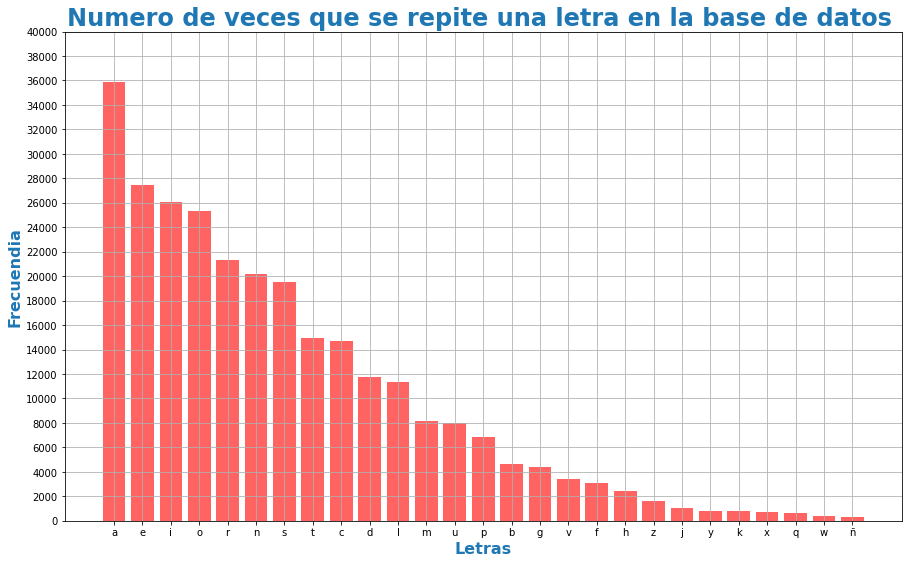

In [ ]:
# grafica de los datos
fig, ax = plt.subplots(figsize = (15,9))
#plt.bar(nums,quantity_word)
plt.bar(order_letter,order_tsl,color="#ff6362" )
ax.set_ylabel("Frecuendia", fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("Letras", fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_title('Numero de veces que se repite una letra en la base de datos ', loc = "center", fontdict = {'fontsize':24, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_yticks(range(0,40001,2000))
ax.grid()
plt.show()

## 5. Medidas de posicionamiento estadístico:
* Determinar los cuartiles 1, 2 y 3 y percentil 90 para la distribución de la longitud de las palabras presentadas en el juego.
* Determinar los cuartiles 1, 2 y 3 para la distribución del posicionamiento de cada una de las letras del alfabeto en las palabras presentadas en el juego.

El percentil 90 es:  12.0  El percentil 75:  10.0 El percentil 50: 8.0 El percentil 25: 7.0


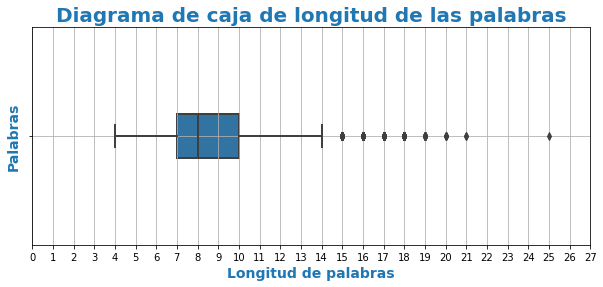

In [ ]:
Q9,Q3,Q2,Q1 = np.percentile(df["tamaño"],[90,75,50,25])
print("El percentil 90 es: ", Q9," El percentil 75: ",Q3,"El percentil 50:",Q2,"El percentil 25:",Q1)
#grafica de caja de bigotes
fig, ax = plt.subplots(figsize = (10,4))
#plt.bar(nums,quantity_word)
sns.boxplot(x = df["tamaño"],linewidth=2, width=0.2)
ax.set_ylabel("Palabras", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("Longitud de palabras", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_title('Diagrama de caja de longitud de las palabras', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xticks(range(0,28,1))
ax.grid()
plt.show()

In [ ]:
# se hace la matriz para las posiciones 
def positions_letters(data_words,letters):
  matriz_pos = []
  k = 0
  # primer for para todas las letras 
  for i in letters:
    matriz_pos.append([])
    #para las palabras 
    for word in data_words:
      #para las letras
      for j,L in enumerate(word):
        if i == L:
          matriz_pos[k].append(j)
    k+=1#aumenta en uno para agregar en el siguiente renglon  
  return matriz_pos
matriz_pos = positions_letters(df["palabras"],letters_abc)


In [ ]:

# ahora se obtiene los percentiles

def percentile(data,letters):
  matriz = []
  for i,letter in enumerate(data):
    Q9,Q3,Q2,Q1 = np.percentile(data[i],[90,75,50,25])
    matriz.append([Q9,Q3,Q2,Q1])
  #mostrar contenido
    #print(letters[i],"=","El percentil 90 es: ",Q9," El percentil 75: ",Q3,"El percentil 50:",Q2,"El percentil 25:",Q1)

  return matriz
percen = percentile(matriz_pos, letters_abc )
df_percentil = pd.DataFrame(percen,columns=["Q 90","Q3","Q2","Q1"])
df_percentil

Q 90   Q3   Q2   Q1
0    9.0  7.0  5.0  2.0
1    7.0  5.0  2.0  1.0
2    8.0  6.0  3.0  0.0
3    9.0  7.0  5.0  2.0
4    8.0  6.0  3.0  1.0
5    6.0  4.0  2.0  0.0
6    6.0  5.0  3.0  2.0
7    6.0  4.0  2.0  0.0
8    8.0  6.0  4.0  3.0
9    5.0  4.0  2.0  0.0
10   7.0  4.0  3.0  0.0
11   8.0  5.0  3.0  2.0
12   7.0  5.0  2.0  1.0
13   9.0  7.0  5.0  2.0
14   9.0  7.0  5.0  2.0
15   4.6  3.0  2.0  0.0
16   5.0  4.0  2.0  1.0
17   7.0  5.0  4.0  2.0
18  10.0  8.0  5.0  2.0
19   8.0  6.0  4.0  2.0
20   6.0  4.0  3.0  1.0
21   7.0  5.0  3.0  1.0
22   5.0  4.0  2.0  0.0
23   4.0  2.0  1.0  1.0
24   7.0  5.0  4.0  2.0
25   9.0  7.0  5.0  3.0
26   6.0  5.0  4.0  2.0

## 6. Medidas de dispersión estadística:
* Determinar el rango, varianza y desviación estándar para la longitud de las palabras presentadas en el banco de palabras.
* Determinar el rango, varianza y desviación estándar para la posición de cada letra dentro de una palabra en el banco de palabras.

In [ ]:
# se muestran las medidas de dispersion rango, varianza y desvicaion estandar para el tamaño de las palabras
print("Tamaño palabras:","rango es: ",max(df["tamaño"])-min(df["tamaño"]),"la varianza es: ",stat.variance(df["tamaño"]),"la desviación estandara es:",stat.stdev(df["tamaño"]))

Tamaño palabras: rango es:  21 la varianza es:  6.78211763116705 la desviación estandara es: 2.6042499171867224


In [ ]:
# se muestran las medidas de dispersion rango, varianza y desvicaion estandar para las posiciones
def measure_dispersion(data,letters):
  matriz = []
  for i, letter in enumerate(data):
    Range = max(letter)-min(letter)
    variance = stat.variance(letter)
    std_dev = stat.stdev(letter)
    matriz.append([letters[i],Range,variance,std_dev])
    #print(letters[i],"=","rango es: ",Range,"la varianza es: ",variance,"la desviación estandara es:",std_dev)
  return matriz
dfmeasures_dispersion = pd.DataFrame(measure_dispersion(matriz_pos,letters_abc),columns=["Letras","Rango","Varianza","Dev. estandar"])
dfmeasures_dispersion


Letras  Rango   Varianza  Dev. estandar
0       a     22   9.532544       3.087482
1       b     16   7.038299       2.652979
2       c     16   9.008136       3.001356
3       d     20  10.570742       3.251268
4       e     18  10.073442       3.173869
5       f     16   5.870245       2.422859
6       g     15   5.650753       2.377131
7       h     14   5.956297       2.440553
8       i     20   7.603153       2.757381
9       j     13   5.028588       2.242451
10      k     14   6.837126       2.614790
11      l     19   7.419580       2.723891
12      m     19   8.174672       2.859138
13      n     23   9.916470       3.149043
14      o     24  10.631350       3.260575
15      p     17   4.045860       2.011432
16      q     13   4.304620       2.074758
17      r     15   6.946885       2.635694
18      s     20  13.509810       3.675569
19      t     21   8.545850       2.923329
20      u     16   4.540657       2.130882
21      v     14   7.217565       2.686553
22      w     11   4.853261       2.203012
23      x     11   2.415748       1.554268
24      y     13   5.796169       2.407523
25      z     14   6.940055       2.634398
26      ñ     12   3.877675       1.969181

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


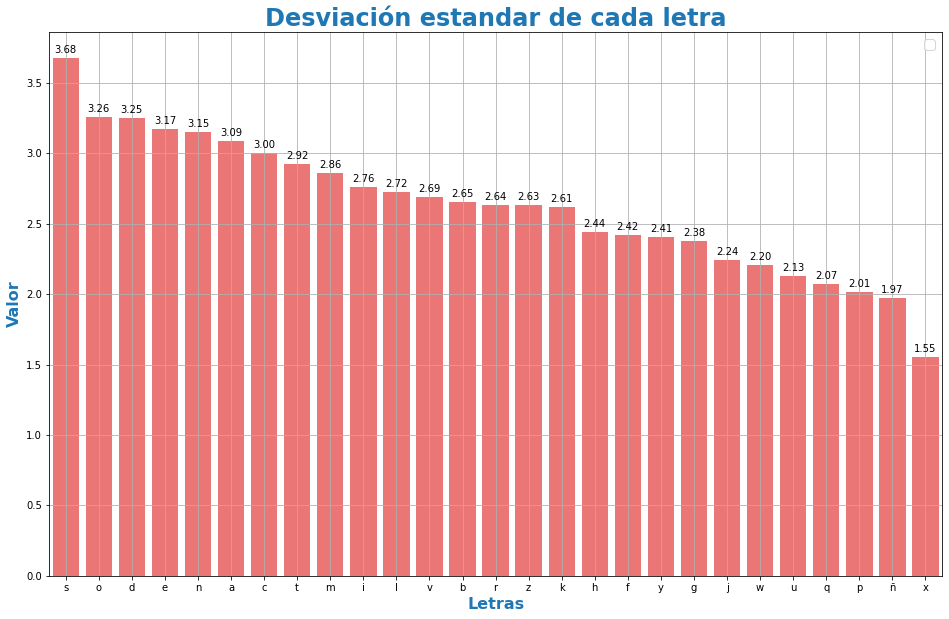

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


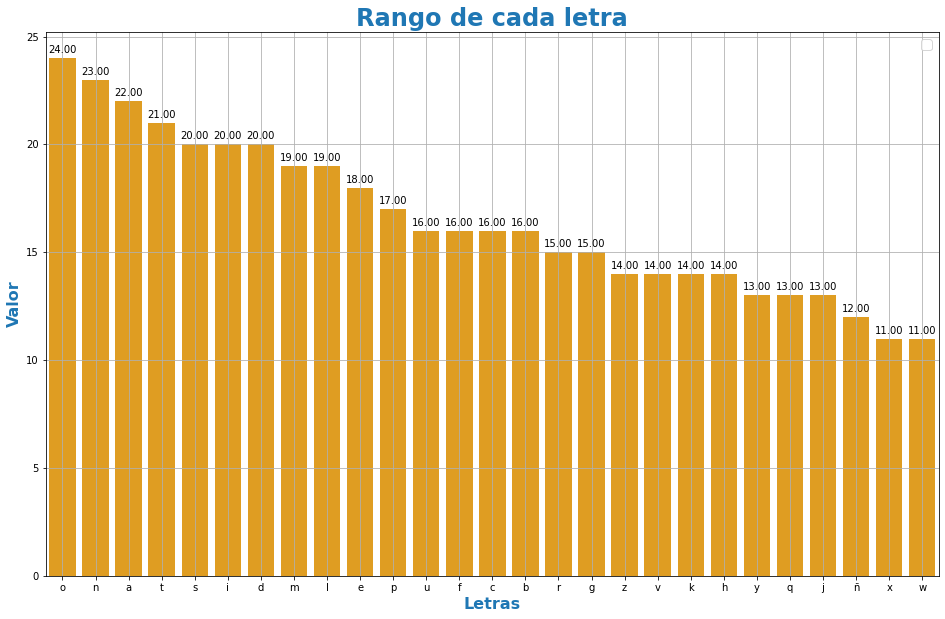

In [ ]:
order_dev,order_letter1 = order(dfmeasures_dispersion["Dev. estandar"],dfmeasures_dispersion['Letras'])
order_range,order_letter = order(dfmeasures_dispersion["Rango"],dfmeasures_dispersion['Letras'])

def measure_dispersion(Data1,Data2,name_title,Color):
  fig, ax = plt.subplots(figsize = (16,10))
  params = {'legend.fontsize': 9.7,'legend.handlelength': 1}
  plt.rcParams.update(params)
  plt.legend()
  ax =sns.barplot(Data2,Data1,color=Color)
  for bar in ax.patches:   
    ax.annotate(format(bar.get_height(), '.2f'),  
                    (bar.get_x() + bar.get_width() / 2,  
                      bar.get_height()), ha='center', va='center', 
                    size=10, xytext=(0, 8), 
                    textcoords='offset points') 
  #ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
  ax.set_ylabel("Valor", fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'tab:blue'})
  ax.set_xlabel('Letras', fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'tab:blue'})
  ax.set_title(name_title, loc = "center", fontdict = {'fontsize':24, 'fontweight':'bold', 'color':'tab:blue'})
  plt.rcParams.update(params)
  plt.legend(fontsize = 14)
  ax.grid()
  plt.show()

measure_dispersion(order_dev,order_letter1,"Desviación estandar de cada letra","#ff6362")
measure_dispersion(order_range,order_letter,"Rango de cada letra","#ffa602")

## 7. Exploración visual de los datos:
* Realizar gráficas que permitan comprender el comportamiento de la longitud de las palabras y la posición de los caracteres en cada una de ellas. Realizar boxplots, scatterplots y gráficas para variables categóricas de ser necesario.
* Realizar el análisis de las gráficas generadas.

In [ ]:
# graficas de vigotes
def grafic_box(data,letters):
  for i in range(len(data)):
    fig, ax = plt.subplots(figsize = (10,4))
    plt.subplot(ax)
    sns.boxplot( matriz_pos[i],linewidth=2, width=0.2,color="#00c0a7")
    ax.set_yticklabels(letters[i], fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'}) 
    ax.set_xlabel("posiciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    ax.set_title('Diagrama de caja de: '+letters[i], loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
    ax.grid()
    plt.show()


### tamaño de las palabras

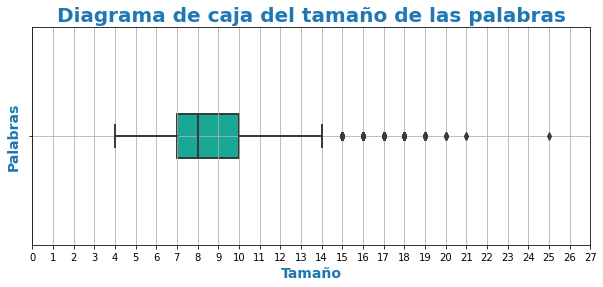

In [ ]:
#grafica de caja de bigotes
fig, ax = plt.subplots(figsize = (10,4))
#plt.bar(nums,quantity_word)
sns.boxplot(x = df["tamaño"],linewidth=2, width=0.2,color = "#00c0a7")
ax.set_ylabel("Palabras", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("Tamaño", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_title('Diagrama de caja del tamaño de las palabras', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xticks(range(0,28,1))
ax.grid()
plt.show()

### posiciones 

In [ ]:
print(matriz_pos[0])

[0, 0, 6, 2, 2, 0, 0, 5, 1, 4, 6, 0, 7, 0, 5, 3, 6, 1, 3, 5, 4, 8, 2, 4, 1, 3, 3, 8, 0, 6, 3, 0, 0, 3, 5, 7, 5, 1, 0, 3, 7, 5, 3, 6, 4, 6, 6, 3, 1, 5, 4, 6, 1, 6, 0, 0, 5, 8, 7, 4, 1, 5, 0, 3, 5, 4, 7, 6, 11, 6, 6, 3, 0, 5, 3, 7, 2, 8, 0, 7, 5, 0, 7, 0, 3, 1, 1, 4, 7, 3, 4, 0, 3, 2, 8, 1, 0, 0, 6, 4, 5, 1, 0, 4, 1, 3, 5, 7, 2, 4, 6, 3, 1, 3, 5, 6, 11, 4, 0, 7, 1, 6, 2, 4, 1, 5, 1, 6, 1, 2, 4, 1, 6, 0, 3, 5, 1, 3, 5, 4, 4, 1, 7, 0, 4, 1, 0, 1, 5, 2, 1, 7, 3, 3, 8, 1, 6, 7, 1, 3, 6, 6, 8, 4, 5, 6, 1, 8, 4, 7, 6, 0, 7, 1, 5, 4, 4, 0, 4, 3, 1, 3, 2, 4, 4, 4, 4, 0, 9, 12, 7, 1, 0, 0, 3, 5, 7, 2, 6, 1, 3, 0, 5, 0, 7, 1, 4, 1, 3, 2, 4, 9, 1, 4, 2, 4, 9, 7, 0, 6, 8, 1, 5, 6, 4, 1, 4, 8, 0, 2, 1, 7, 8, 1, 7, 5, 1, 4, 3, 0, 6, 5, 2, 6, 8, 1, 3, 13, 4, 14, 6, 7, 9, 8, 7, 4, 3, 6, 7, 3, 1, 4, 7, 5, 8, 4, 7, 3, 1, 4, 6, 3, 1, 4, 0, 4, 6, 1, 1, 3, 3, 5, 4, 0, 7, 0, 1, 0, 6, 0, 6, 0, 6, 1, 4, 1, 7, 2, 4, 4, 4, 1, 7, 6, 0, 1, 1, 5, 5, 7, 0, 6, 3, 10, 0, 6, 4, 10, 0, 3, 3, 4, 9, 6, 5, 6, 5, 6, 0, 0, 7,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


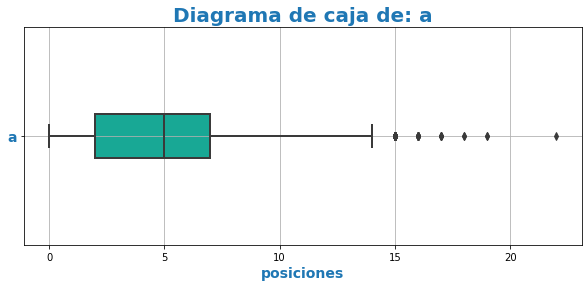

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


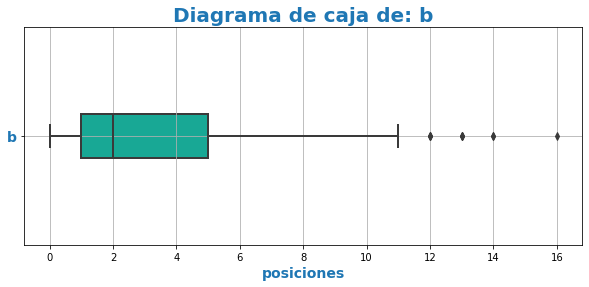

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


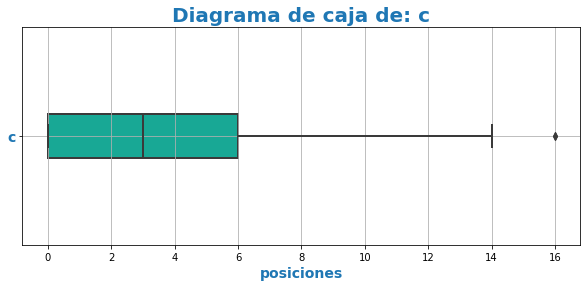

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


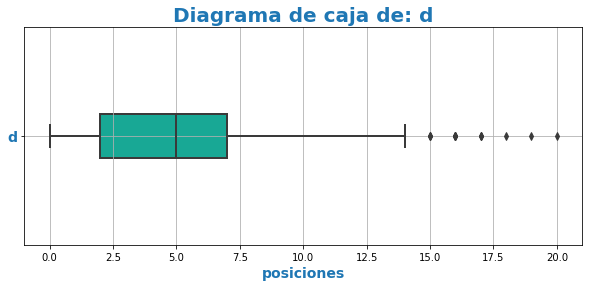

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


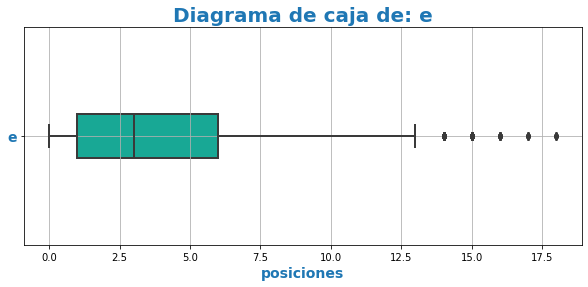

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


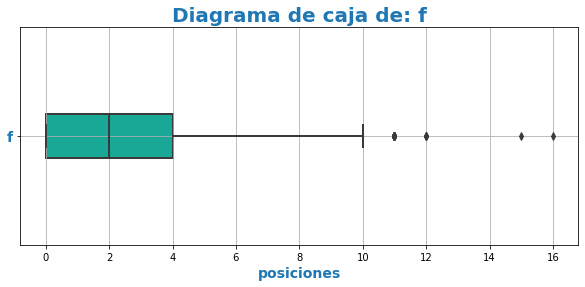

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


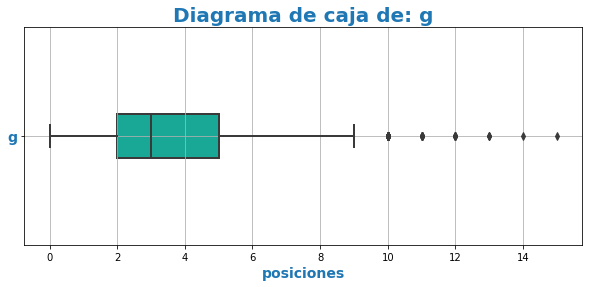

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


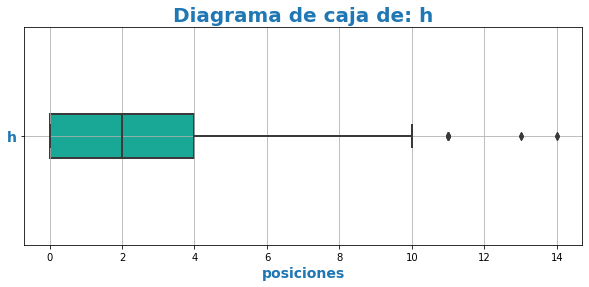

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


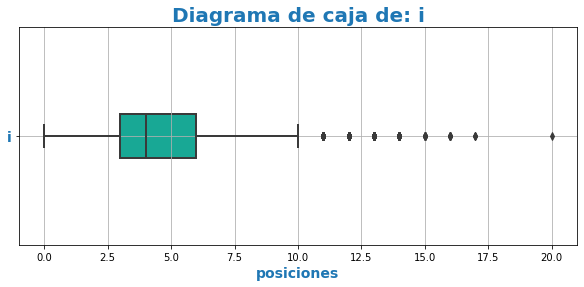

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


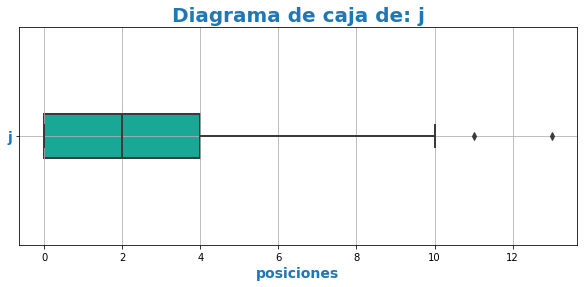

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


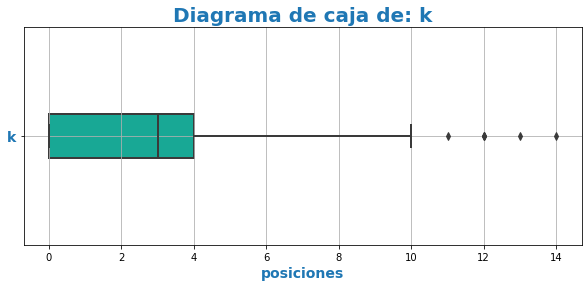

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


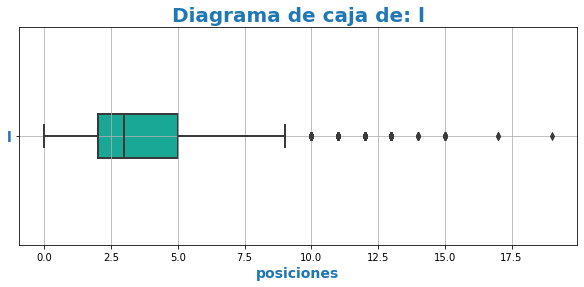

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


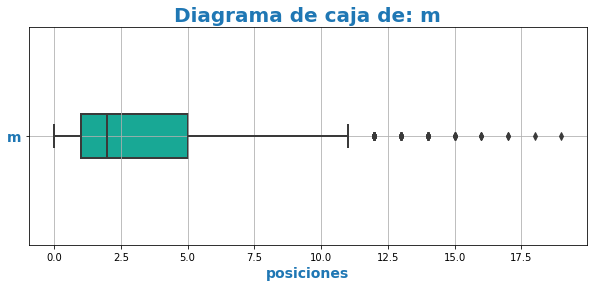

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


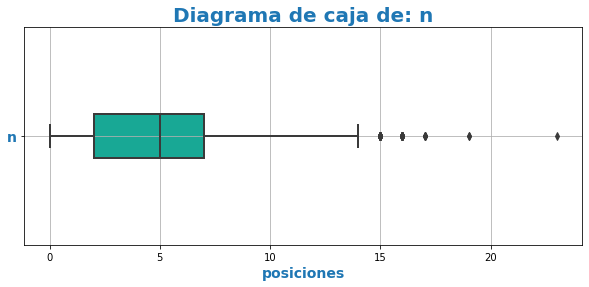

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


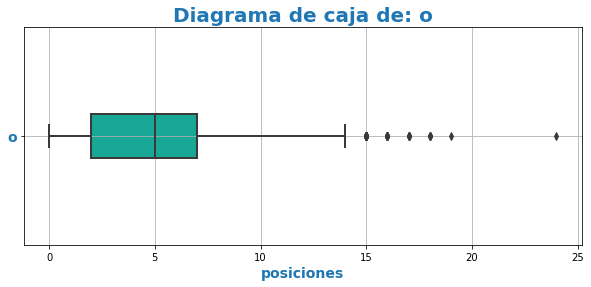

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


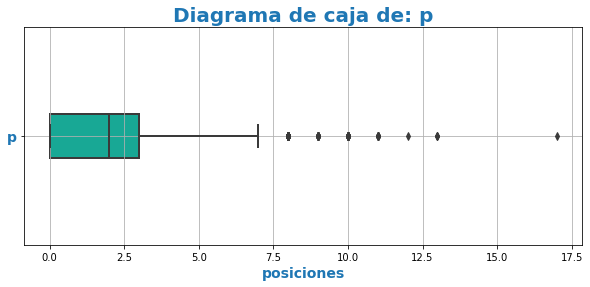

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


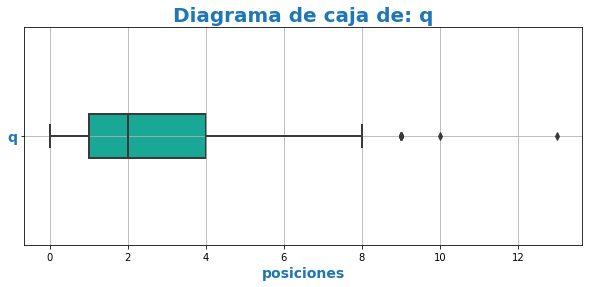

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


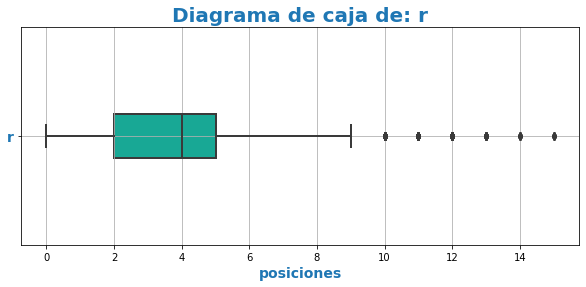

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


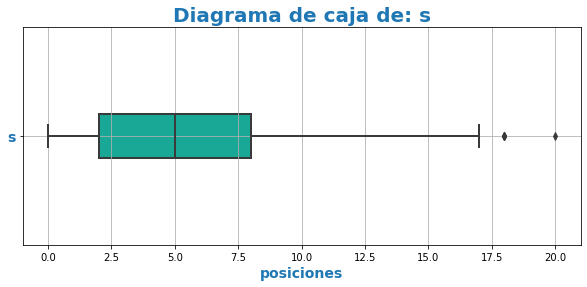

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


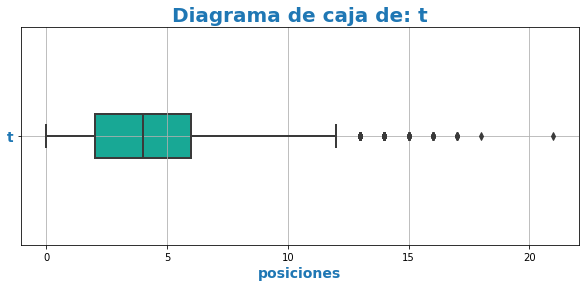

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


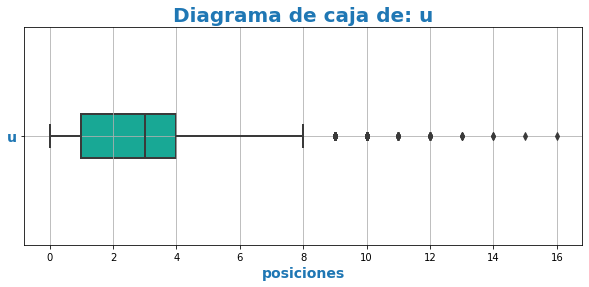

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


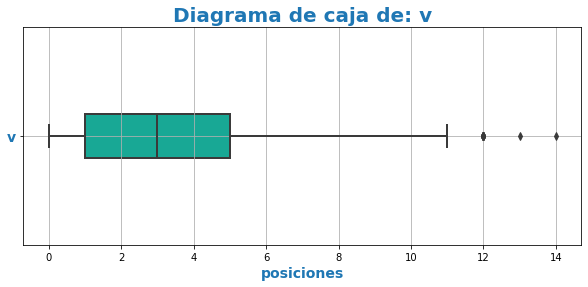

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


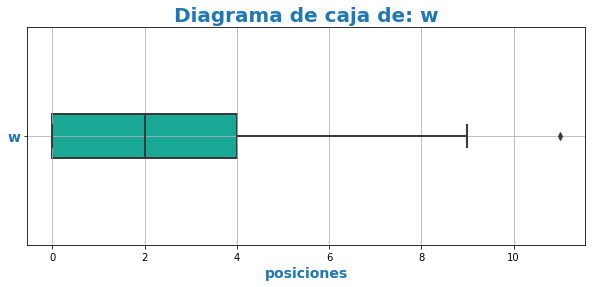

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


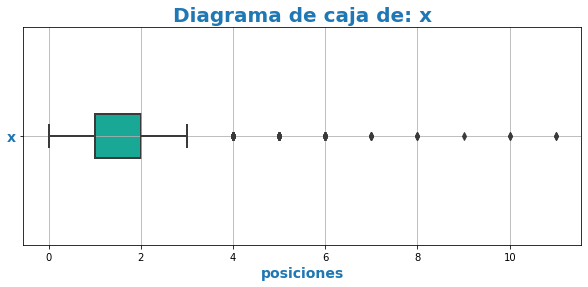

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


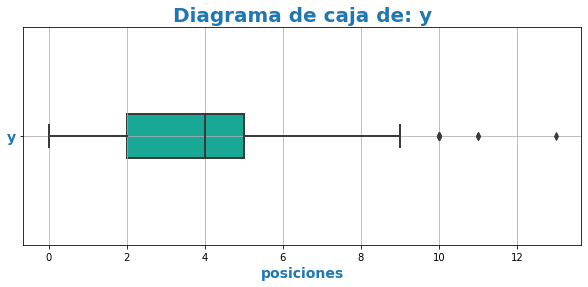

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


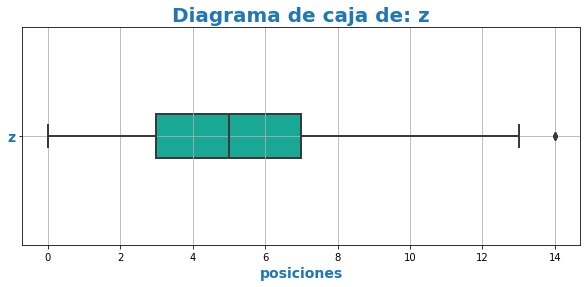

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


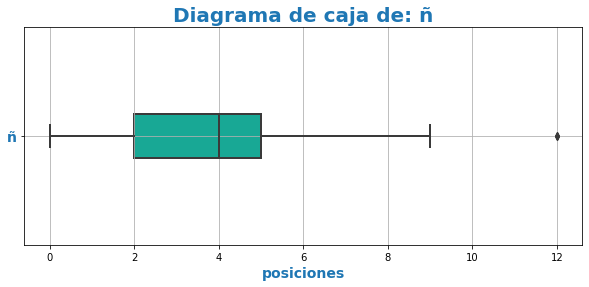

In [ ]:
grafic_box(matriz_pos,letters_abc)


## 8. Distribuciones de datos:
* Realizar gráficas de distribución para las longitudes de las palabras presentadas.
* Realizar gráficas de distribución para la posición de un carácter en especifico en cada palabra.
* Realizar el análisis de las gráficas generadas.

In [ ]:
sizemean = np.mean(matriz_pos[0])
sizemean

4.623947353744911

In [ ]:
def grafic_hist(Data,letters):
  for i in range(len(Data)):
    sizemean = np.mean(Data[i])
    strsizemean = str(np.mean(Data[i]))
    sizemedian = np.median(Data[i])
    fig, ax = plt.subplots()
    params = {'legend.fontsize': 9.7,'legend.handlelength': 1}
    plt.rcParams.update(params)
    plt.legend()
    sns.despine(fig)
    sns.histplot(Data[i],binwidth=0.5)
    ax.set_title('Histograma de las posiciones de la letra: '+ letters[i], loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
    ax.axvline(x=sizemean, color ="red", label = "Media: "+strsizemean[:4], lw = 4)
    ax.axvline(x=sizemedian, color ="#ffba00", label = "Mediana: "+str(sizemedian), lw = 4)
    plt.rcParams.update(params)
    plt.legend(fontsize = 14)
    ax.grid()
    ax.set_xlabel("posiciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    ax.set_ylabel("frecuencia", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    plt.show()


No handles with labels found to put in legend.


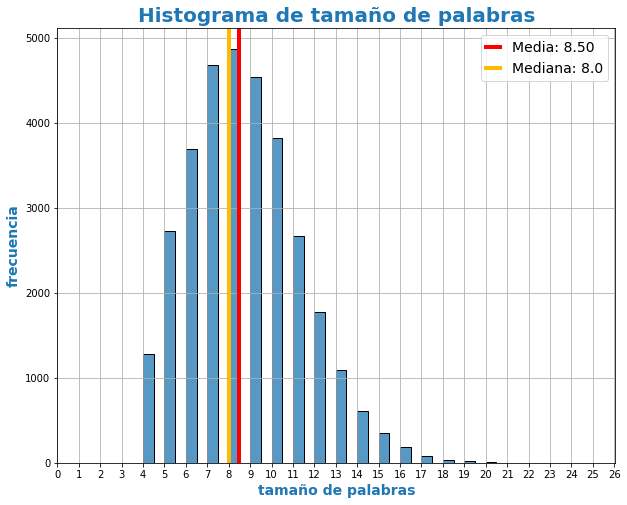

In [ ]:
#se grafica los datos de tendencia central
fig, ax = plt.subplots(figsize = (10,8))
params = {'legend.fontsize': 9.7,'legend.handlelength': 1}
plt.rcParams.update(params)
plt.legend()
ax.axvline(x=size_mean, color ="red", label = "Media: "+str(size_mean)[:4], lw = 4)
ax.axvline(x=size_median, color ="#ffba00", label = "Mediana: "+str(size_median), lw = 4)
sns.histplot(df.iloc[:,1],binwidth=0.5)
ax.set_title('Histograma de tamaño de palabras', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
plt.rcParams.update(params)
plt.legend(fontsize = 14)
ax.grid()
ax.set_xticks(range(0,27,1))
ax.set_xlabel("tamaño de palabras", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("frecuencia", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

plt.show()

### posciones

No handles with labels found to put in legend.


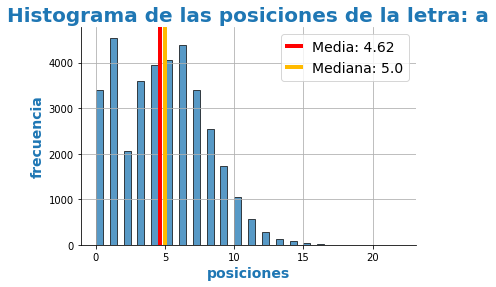

No handles with labels found to put in legend.


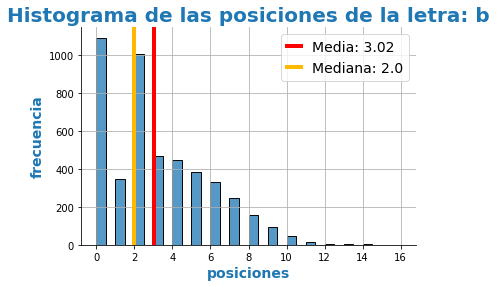

No handles with labels found to put in legend.


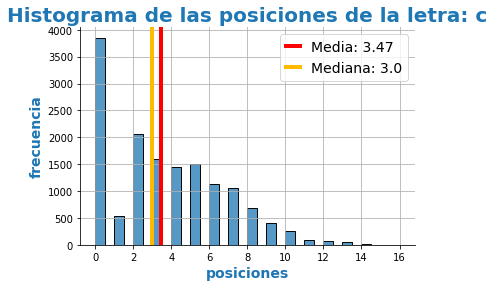

No handles with labels found to put in legend.


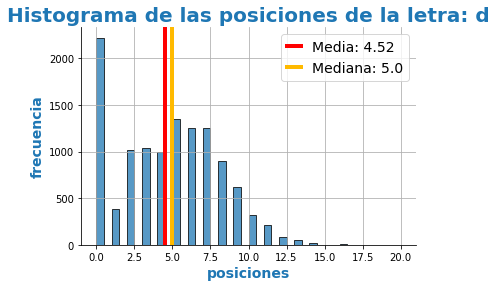

No handles with labels found to put in legend.


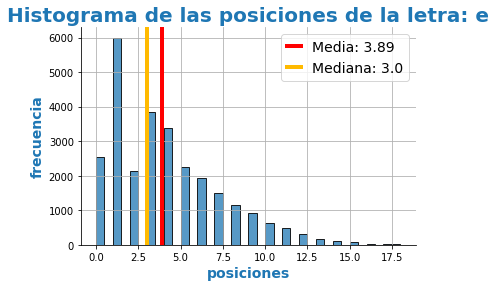

No handles with labels found to put in legend.


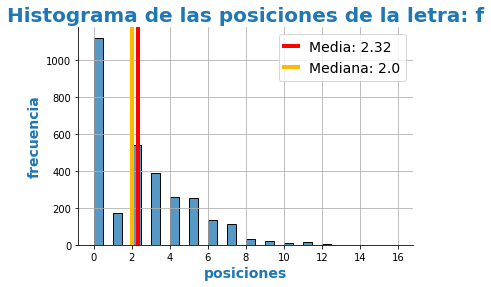

No handles with labels found to put in legend.


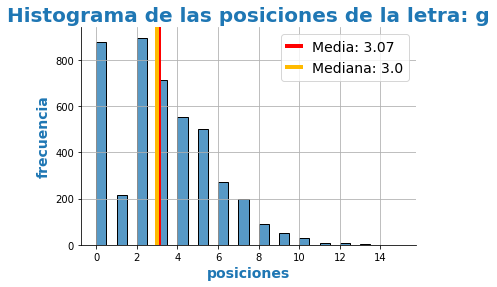

No handles with labels found to put in legend.


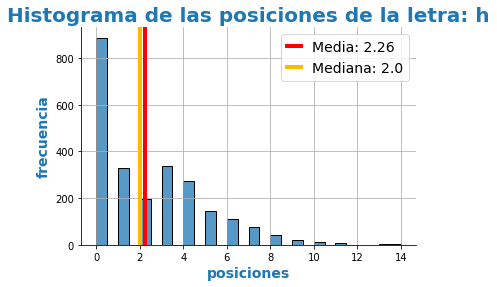

No handles with labels found to put in legend.


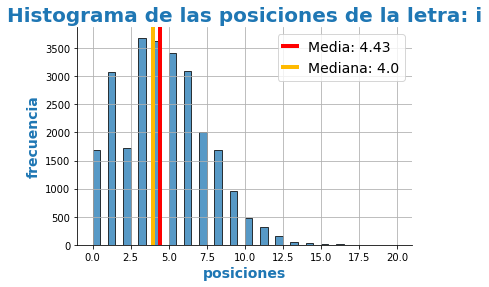

No handles with labels found to put in legend.


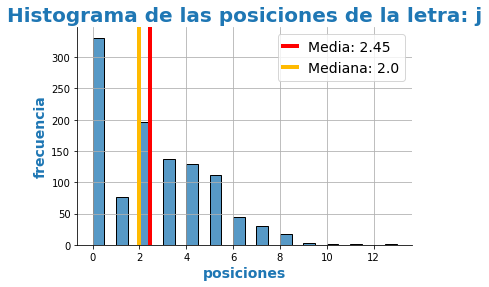

No handles with labels found to put in legend.


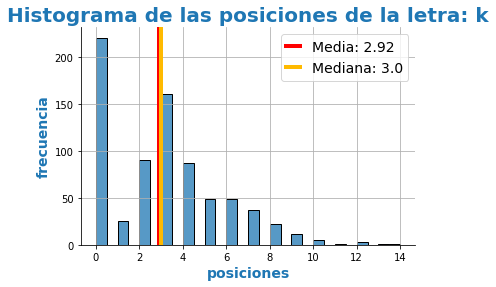

No handles with labels found to put in legend.


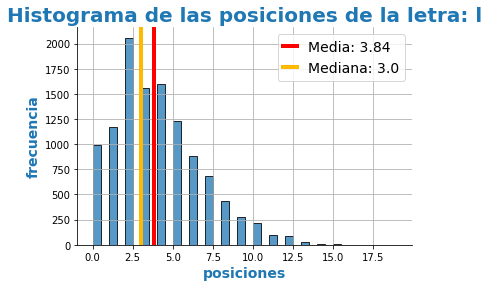

No handles with labels found to put in legend.


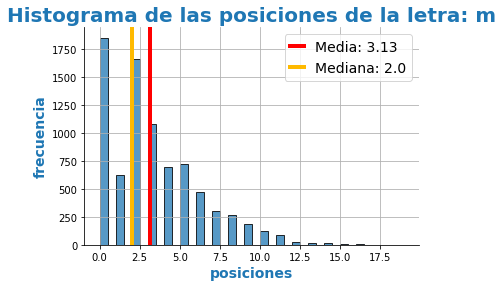

No handles with labels found to put in legend.


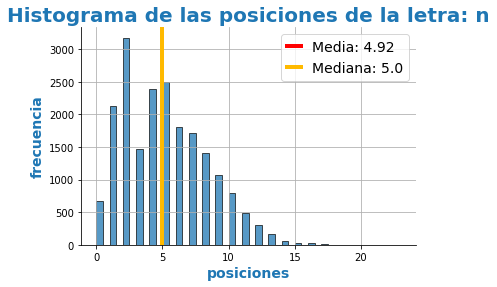

No handles with labels found to put in legend.


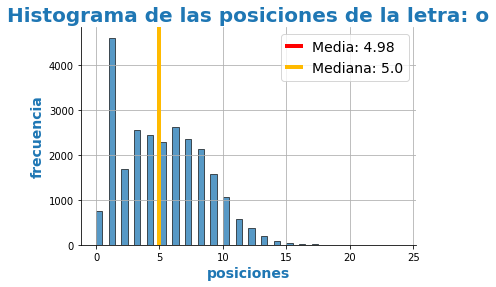

No handles with labels found to put in legend.


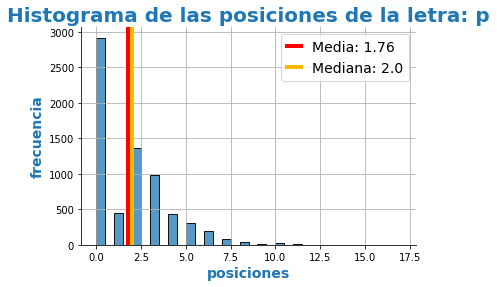

No handles with labels found to put in legend.


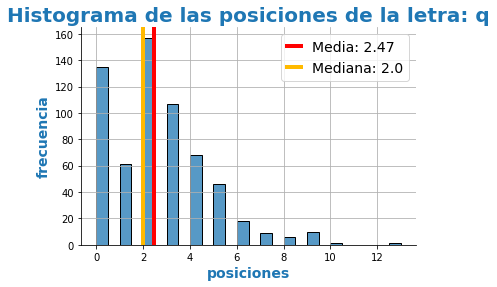

No handles with labels found to put in legend.


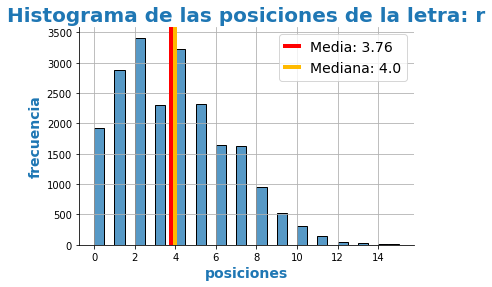

No handles with labels found to put in legend.


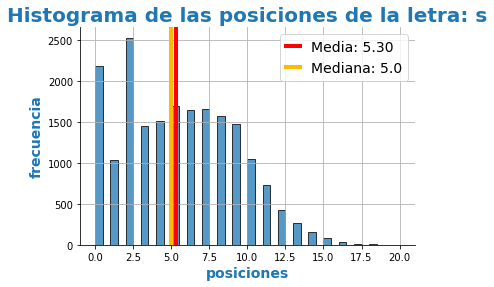

No handles with labels found to put in legend.


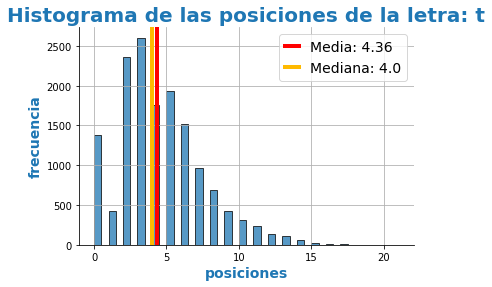

No handles with labels found to put in legend.


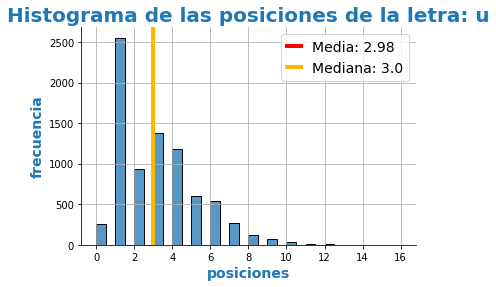

No handles with labels found to put in legend.


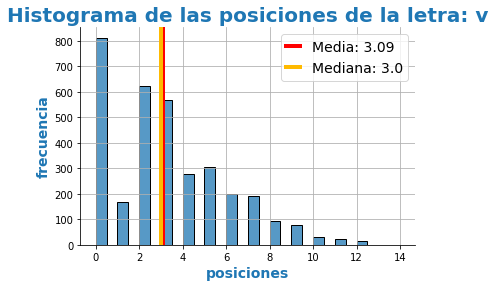

No handles with labels found to put in legend.


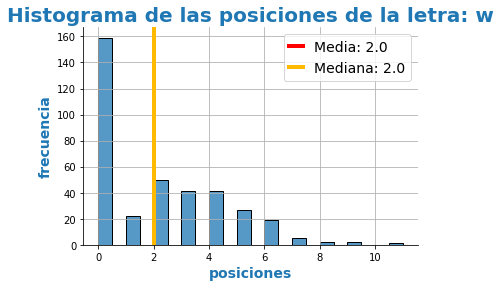

No handles with labels found to put in legend.


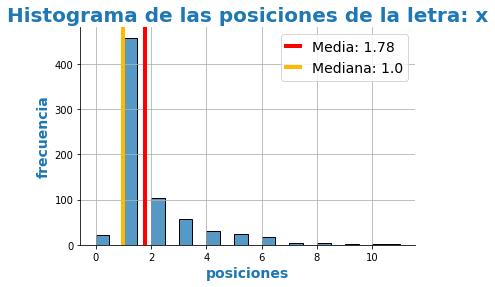

No handles with labels found to put in legend.


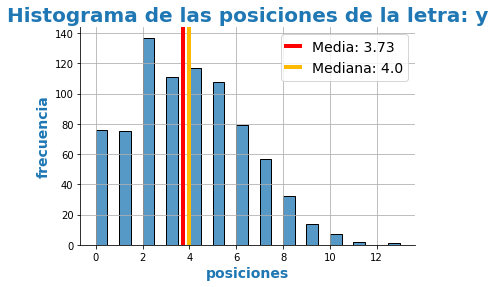

No handles with labels found to put in legend.


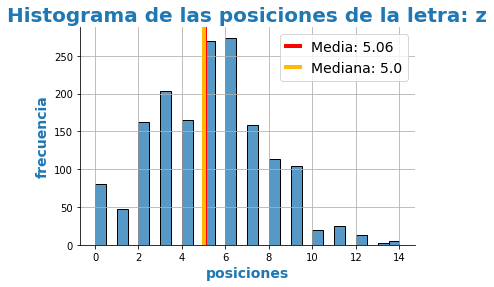

No handles with labels found to put in legend.


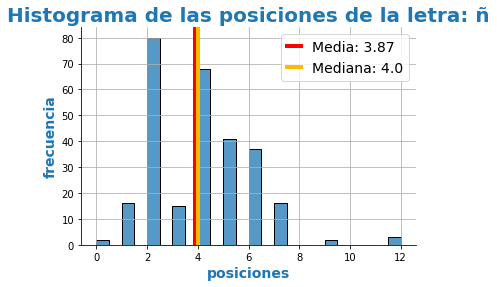

In [ ]:
grafic_hist(matriz_pos,letters_abc)

## 9. Introducción a las pruebas de hipótesis:

* Determinar si existe significancia estadística entre las posiciones en las que están las vocales y consonantes ubicadas en las palabras



In [ ]:
from pandas._libs import index
def get_vowels_consonants(Data):
  # estos primeros arreglos me entregan la posicion en frecuencia 
  vawols = [x*0 for x in range(max(df["tamaño"]))]
  consonants = [x*0 for x in range(max(df["tamaño"]))]
  # estos arreglos me entregan las posiciones 
  pos_vawols = []
  pos_consonants = []
  for word in Data:
    for pos,L in enumerate(word):
      if(L in "aeiou"):
        vawols[pos] += 1
        pos_vawols.append(pos)
      else:
        consonants[pos]+= 1
        pos_consonants.append(pos)
  return vawols,consonants,pos_vawols,pos_consonants

vawols,consonants,pos_vawols,pos_consonants = get_vowels_consonants(re.split(" ",data))
#print(vawols,"\n",consonants)
# S e agrega el contenido de las vocales aun data frame 
df_vaw_con = pd.DataFrame( columns=["Vawols","Consonants"])
df_vaw_con["Vawols"] = vawols
df_vaw_con["Consonants"] = consonants
df_vaw_con = df_vaw_con.transpose()
print(pos_vawols,"\n",pos_consonants )
df_vaw_con

[0, 1, 3, 5, 6, 9, 0, 1, 3, 6, 8, 1, 4, 6, 1, 2, 4, 2, 6, 9, 0, 1, 3, 4, 0, 1, 3, 5, 7, 1, 4, 5, 7, 1, 3, 4, 6, 0, 2, 5, 7, 9, 1, 4, 6, 7, 0, 1, 3, 5, 7, 0, 3, 6, 7, 1, 3, 6, 9, 10, 1, 3, 5, 7, 0, 2, 3, 5, 7, 1, 4, 7, 8, 1, 2, 4, 7, 9, 11, 12, 15, 1, 4, 7, 10, 1, 4, 6, 8, 9, 12, 1, 3, 0, 3, 5, 6, 8, 10, 11, 14, 0, 2, 3, 6, 0, 3, 1, 4, 6, 7, 0, 1, 3, 5, 6, 9, 1, 4, 0, 2, 3, 5, 6, 1, 3, 5, 1, 3, 6, 7, 1, 3, 5, 1, 3, 5, 1, 4, 0, 2, 3, 1, 3, 5, 7, 1, 2, 5, 0, 4, 6, 1, 3, 0, 2, 4, 6, 8, 9, 11, 0, 4, 6, 8, 9, 11, 0, 2, 3, 5, 1, 4, 6, 8, 1, 3, 1, 4, 5, 8, 11, 2, 4, 6, 1, 4, 6, 1, 3, 5, 6, 9, 0, 2, 3, 6, 0, 1, 3, 6, 8, 1, 4, 6, 1, 2, 5, 1, 4, 6, 7, 0, 3, 6, 8, 1, 4, 6, 8, 9, 1, 3, 5, 7, 9, 10, 1, 2, 4, 2, 4, 6, 7, 10, 1, 4, 6, 0, 4, 7, 9, 2, 5, 1, 3, 5, 0, 2, 3, 5, 1, 4, 6, 7, 9, 1, 3, 5, 7, 0, 3, 6, 8, 9, 11, 13, 1, 3, 5, 6, 9, 1, 3, 5, 1, 4, 6, 8, 0, 2, 4, 6, 8, 1, 3, 5, 8, 1, 3, 5, 8, 10, 0, 3, 5, 8, 1, 4, 6, 8, 9, 11, 1, 3, 5, 7, 2, 4, 6, 8, 10, 11, 2, 4, 6, 8, 9, 12, 0, 1, 3, 5, 7, 9, 10,

0      1      2      3      4      5      6      7     8   \
Vawols       8613  20779   8547  15057  14564  12623  12593   9539  7624   
Consonants  23817  11651  23883  17373  16582  15797  12140  10508  7550   

              9   ...   15  16  17  18  19  20  21  22  23  24  
Vawols      5223  ...  162  51  26  17   3   1   0   1   0   1  
Consonants  5416  ...  157  84  33   7   5   2   1   0   1   0  

[2 rows x 25 columns]

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


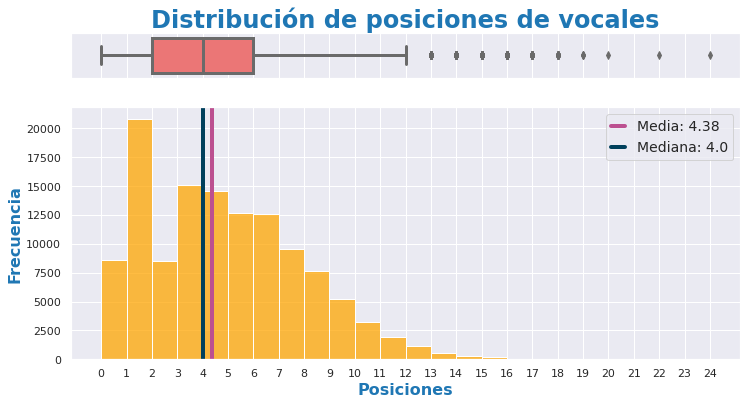

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


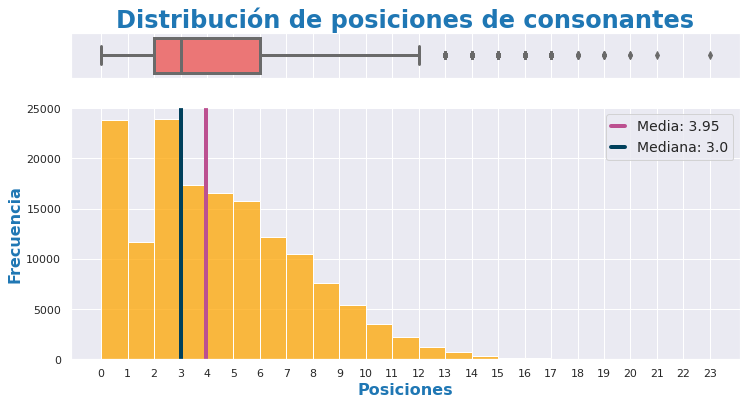

In [ ]:
#grafica de caja de bigotes y histograma
def grafic_box_hist(Data,title,axes_x,axes_y):
  meandata = np.mean(Data)
  mediandata = np.median(Data)
  # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
  sns.set(style="darkgrid")
  # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
  f, (ax_box, ax_hist) = plt.subplots(2,figsize = (12,6), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
  params = {'legend.fontsize': 9.7,'legend.handlelength': 1}
  plt.rcParams.update(params)
  plt.legend()
  # assigning a graph to each ax
  sns.boxplot(Data,color="#ff6362",linewidth=3,ax=ax_box)
  sns.histplot(Data, binwidth=1,color="#ffa602" ,ax=ax_hist)
  ax_hist.axvline(x=meandata, color ="#bc5090", label = "Media: "+str(meandata)[:4], lw = 4)
  ax_hist.axvline(x=mediandata, color ="#00405c", label = "Mediana: "+str(mediandata), lw = 4)
  ax_hist.set_xticks(range(max(Data)+1))
  # Remove x axis name for the boxplot
  ax_box.set(xlabel='')
  ax_box.set_title(title, loc = "center", fontdict = {'fontsize':24, 'fontweight':'bold', 'color':'tab:blue'})
  ax_hist.set_xlabel(axes_x, fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'tab:blue'})
  ax_hist.set_ylabel(axes_y, fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'tab:blue'})
  plt.rcParams.update(params)
  plt.legend(fontsize = 14)
  plt.show()
grafic_box_hist(pos_vawols,'Distribución de posiciones de vocales',"Posiciones","Frecuencia")
grafic_box_hist(pos_consonants,'Distribución de posiciones de consonantes',"Posiciones","Frecuencia")

De las anteriores graficas se puede evidenciar que tiene una asimetría hacia la derecha. Así mismo la posición de las vocales tiene una media de 4.38 y una mediana de 4.0 posiciones. La posición de las consonantes tiene una media de 3.95 y una mediana de 3.0 posiciones. En el gráfico de caja de bigotes se muestra que hay datos atípicos, para ello se toma como condición que los datos atípicos por encima de Q3+1.5RIC se eliminaran.

In [ ]:
# se calcuala la condicion
Q3v,Q1v = np.percentile(pos_vawols,[75,25])
Q3c,Q1c = np.percentile(pos_consonants,[75,25])
Condition_vawols = Q3v + 1.5*(Q3v-Q1v)
Condition_consonants = Q3c + 1.5*(Q3c-Q1c)
print("datos atipicos vocales:",Condition_vawols )
print("datos atipicos consonates:",Condition_consonants )
#datos filtrados 
filter_pos_vawols = [i for i in pos_vawols if i <= Condition_vawols]
filter_pos_consonants = [j for j in pos_consonants if j <= Condition_consonants]
print("datos filtrados vocales:\n ",filter_pos_vawols)
print("datos filtrados consonates:\n",filter_pos_consonants)

print(np.percentile(filter_pos_consonants,[100]))

datos atipicos vocales: 12.0
datos atipicos consonates: 12.0
datos filtrados vocales:
  [0, 1, 3, 5, 6, 9, 0, 1, 3, 6, 8, 1, 4, 6, 1, 2, 4, 2, 6, 9, 0, 1, 3, 4, 0, 1, 3, 5, 7, 1, 4, 5, 7, 1, 3, 4, 6, 0, 2, 5, 7, 9, 1, 4, 6, 7, 0, 1, 3, 5, 7, 0, 3, 6, 7, 1, 3, 6, 9, 10, 1, 3, 5, 7, 0, 2, 3, 5, 7, 1, 4, 7, 8, 1, 2, 4, 7, 9, 11, 12, 1, 4, 7, 10, 1, 4, 6, 8, 9, 12, 1, 3, 0, 3, 5, 6, 8, 10, 11, 0, 2, 3, 6, 0, 3, 1, 4, 6, 7, 0, 1, 3, 5, 6, 9, 1, 4, 0, 2, 3, 5, 6, 1, 3, 5, 1, 3, 6, 7, 1, 3, 5, 1, 3, 5, 1, 4, 0, 2, 3, 1, 3, 5, 7, 1, 2, 5, 0, 4, 6, 1, 3, 0, 2, 4, 6, 8, 9, 11, 0, 4, 6, 8, 9, 11, 0, 2, 3, 5, 1, 4, 6, 8, 1, 3, 1, 4, 5, 8, 11, 2, 4, 6, 1, 4, 6, 1, 3, 5, 6, 9, 0, 2, 3, 6, 0, 1, 3, 6, 8, 1, 4, 6, 1, 2, 5, 1, 4, 6, 7, 0, 3, 6, 8, 1, 4, 6, 8, 9, 1, 3, 5, 7, 9, 10, 1, 2, 4, 2, 4, 6, 7, 10, 1, 4, 6, 0, 4, 7, 9, 2, 5, 1, 3, 5, 0, 2, 3, 5, 1, 4, 6, 7, 9, 1, 3, 5, 7, 0, 3, 6, 8, 9, 11, 1, 3, 5, 6, 9, 1, 3, 5, 1, 4, 6, 8, 0, 2, 4, 6, 8, 1, 3, 5, 8, 1, 3, 5, 8, 10, 0, 3, 5, 8, 1, 4, 6, 8, 9, 

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


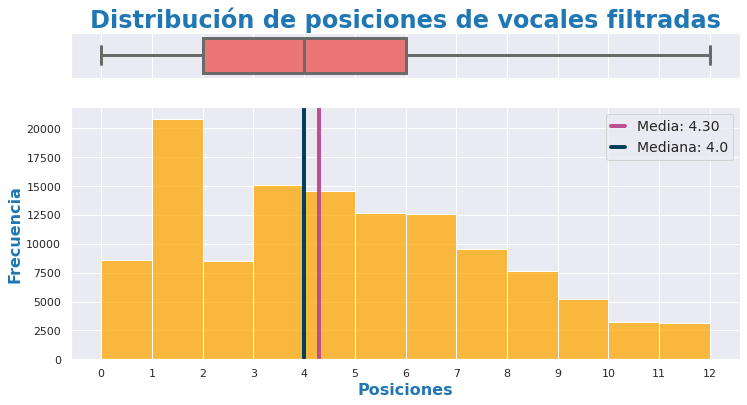

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


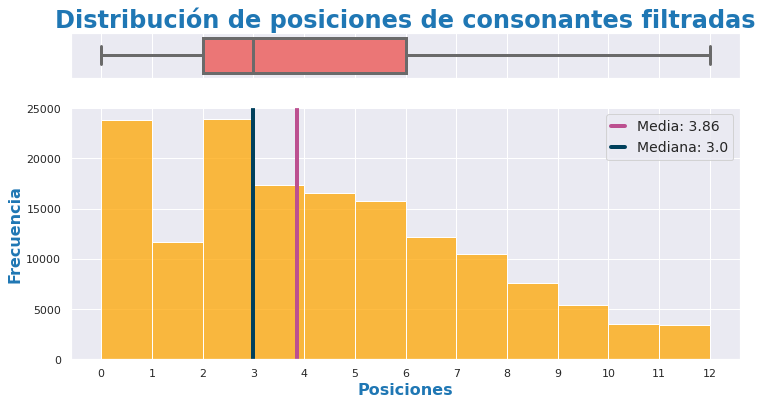

In [ ]:
grafic_box_hist(filter_pos_vawols,'Distribución de posiciones de vocales filtradas',"Posiciones","Frecuencia")
grafic_box_hist(filter_pos_consonants,'Distribución de posiciones de consonantes filtradas',"Posiciones","Frecuencia")

### Tipo de pruebas 
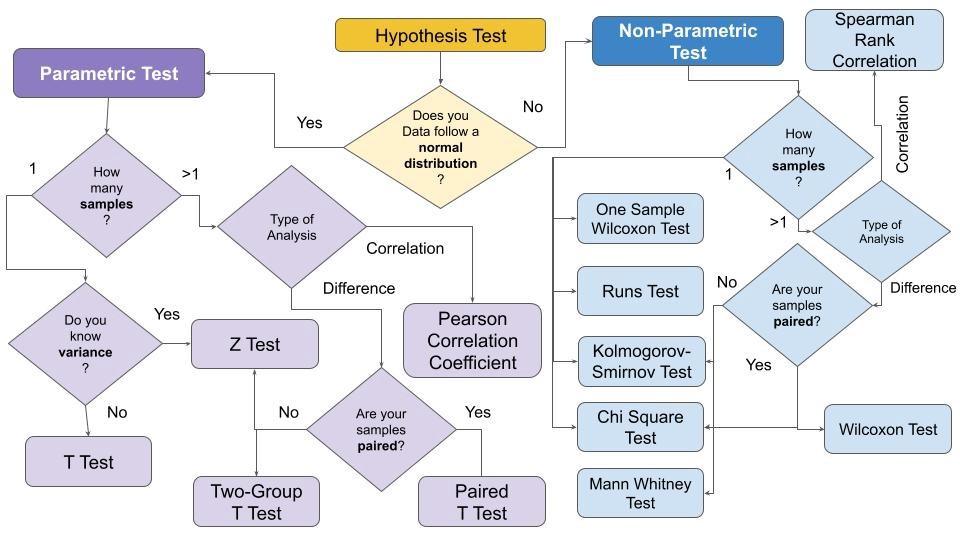

Para hacer la prueba de hipótesis, se analizaron los datos y se observo que no tiene una distribución normal, por lo cual se realiza una prueba no paramétrica, además se tiene mas de una muestra y se quiere hacer un tipo de análisis diferencial, por ultimo las pruebas son pareadas, para ello se hizo una prueba de chi square.


### Ejercicio 1
* H0 = No  existe significancia estadística entre las posiciones en las que están las vocales y consonantes ubicadas en las palabras
* H1 = Existe significancia estadística entre las posiciones en las que están las vocales y consonantes ubicadas en las palabras


In [ ]:

df_filter = pd.DataFrame(columns = ["vawols","consonants"])
df_filter["vawols"] = vawols[:13]
df_filter["consonants"] = consonants[:13]
#df_filter = df_filter.transpose()
print(df_filter)
ch2,p,dof,freq = chi2_contingency(df_filter)
print("estadistica de la prueba: ",ch2 )
print("p value",p )
print("grados de libertad",dof)

    vawols  consonants
0     8613       23817
1    20779       11651
2     8547       23883
3    15057       17373
4    14564       16582
5    12623       15797
6    12593       12140
7     9539       10508
8     7624        7550
9     5223        5416
10    3264        3554
11    1965        2185
12    1145        1236
estadistica de la prueba:  14535.442484437363
p value 0.0
grados de libertad 12


#### conclusión
como los valores de p son menores al nivel de significancia 5% se rechaza la hipótesis nula.
según lo obtenido se tiene la suficiente evidencia estadística para decir que no se puede asegurar que no exista significancia estadística entre las posiciones en las que están las vocales y consonantes ubicadas en las palabras, es decir que es posible exista  significancia estadística entre las posiciones en las que están las vocales y consonantes ubicadas en las palabras 


### Ejercicio 2

* H0 = No  existe significancia estadística entre las frecuencias de las vocales  que están en las palabras y consonantes ubicadas en las palabras
* H1 = Existe significancia estadística entre las frecuencias de las vocales  que están en las palabras y consonantes ubicadas en las palabras


In [ ]:
dfwords = pd.DataFrame(re.split(" ",data), columns=["Palabras"])
dfwords["Longitud de palabras"] = [len(w) for w in dfwords["Palabras"]]
def quantity_vawols_consonats(Data):
  quantity_vawols = []
  quantity_consonats = []
  contV =0
  contC =0
  for word in Data:
    for i,L in enumerate(word):
      if(L in "aeiou"):
        contV += 1
      else:
        contC += 1
    quantity_vawols.append(contV)
    quantity_consonats.append(contC)
    contV = 0
    contC = 0
  return quantity_vawols,quantity_consonats
quantity_vawols,quantity_consonats = quantity_vawols_consonats(dfwords["Palabras"])
dfwords["cantidad de vocales"] = quantity_vawols
dfwords["cantidad de consonantes"] = quantity_consonats
dfwords

Palabras  Longitud de palabras  cantidad de vocales  \
0        aeropuerto                    10                    6   
1         aerodromo                     9                    5   
2          terminal                     8                    3   
3             viaje                     5                    3   
4        transporte                    10                    3   
...             ...                   ...                  ...   
32425    libreville                    10                    4   
32426        rosira                     6                    3   
32427      recitado                     8                    4   
32428  complementen                    12                    4   
32429       ndjembe                     7                    2   

       cantidad de consonantes  
0                            4  
1                            4  
2                            5  
3                            2  
4                            7  
...                        ...  
32425                        6  
32426                        3  
32427                        4  
32428                        8  
32429                        5  

[32430 rows x 4 columns]

In [ ]:
ch2_,p_,dof_,freq_ = chi2_contingency(dfwords[["cantidad de vocales","cantidad de consonantes"]])
print("estadistica de la prueba: ",ch2_ )
print("p value",p_ )
print("grados de libertad",dof_)

estadistica de la prueba:  6085.6500145533455
p value 1.0
grados de libertad 32429


## 10. Determinación de correlación entre variables:



### ejercicio 1
* Determinar la correlación existente entre la longitud de las palabras y la cantidad de vocales contenidas en la misma.
* Determinar la correlación existente entre la longitud de las palabras y la cantidad de consonantes contenidas en la misma.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


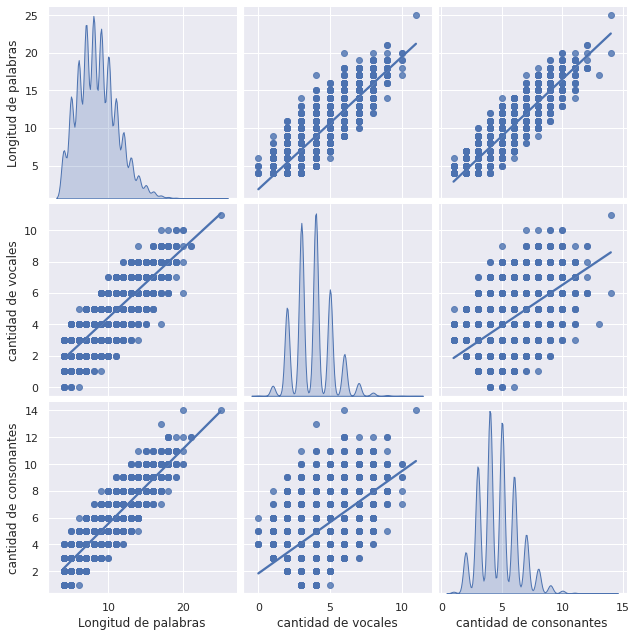

In [ ]:

ax = sns.pairplot(dfwords[["Longitud de palabras","cantidad de vocales","cantidad de consonantes"]],diag_kind = "kde",kind="reg",size = 3,height= 3,palette="#ff6362")
plt.show()

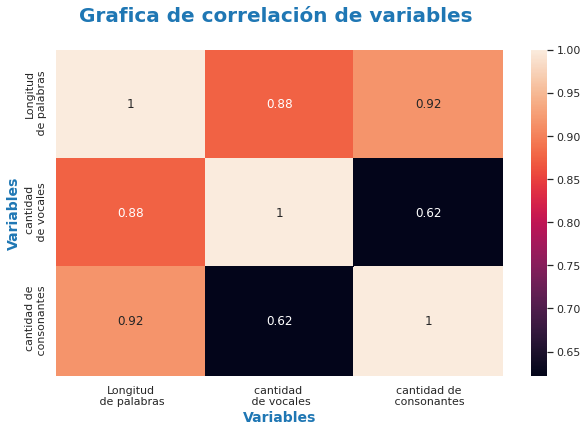

In [ ]:
data_cor = dfwords[["Longitud de palabras","cantidad de vocales","cantidad de consonantes"]]
vars = ["Longitud\n de palabras","cantidad \n de vocales","cantidad de\n consonantes"]
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(data_cor.corr(method="spearman"),annot= True,xticklabels=vars,yticklabels=vars)
ax.set_title('Grafica de correlación de variables \n', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Variables", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("Variables", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()

#### conclusión 

se concluyó que se tiene una correlación estadística fuerte entre las longitudes de las palabras y cantidad de consonantes, además existe una correlación entre la longitud de las palabras y la cantidad de vocales. Por último, se evidencia que también existe una correlación cantidad de vocales y cantidad de consonantes.

### Ejercicio 2
* Determinar la correlación existente entre la frecuencia de las vocales y las consonantes 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


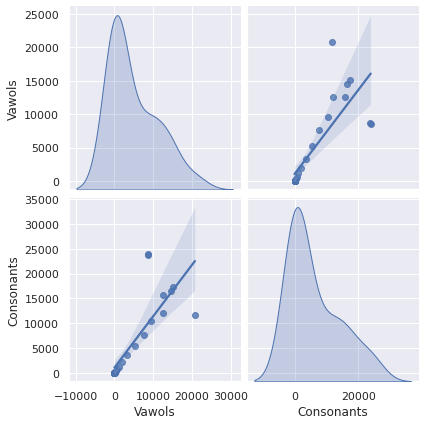

In [ ]:
data_cor1 = df_vaw_con.transpose()
vars = ["Vocales","Consonantes"]
sns.pairplot(data_cor1,diag_kind = "kde",kind="reg",size = 3,height= 3,palette="#ff6362")
plt.show()


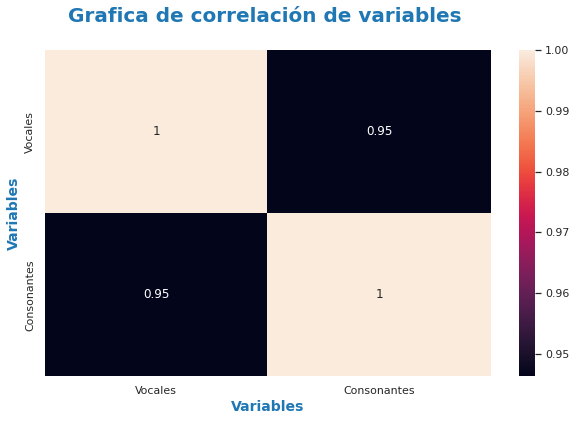

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(data_cor1.corr(method="spearman"),annot= True,xticklabels=vars,yticklabels=vars)
ax.set_title('Grafica de correlación de variables \n', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Variables", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("Variables", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()

se conlusyo que existe una corelación estadistica fuerte entre las frecuencias de las volcales y las consonantes de las palabras


## validacion base de datos

In [ ]:
with open("/content/drive/MyDrive/reto/Data_Base_juan.txt", "r") as j:
  juan = j.read()
with open("/content/drive/MyDrive/reto/final_cleanLauraV4.txt", "r") as l:
  laura = l.read()
with open("/content/drive/MyDrive/reto/data_jorge.txt", "r") as jo:
  jorge = jo.read()

juan = re.split(" ", juan)
laura = re.split(" ", laura)
daniel = re.split(" ",data)
jorge = re.sub("[\s]"," ",jorge).split()

# compara las bases de datsos 
#database 1 es la que se quiere mirar 
#dtabase2 es la que compara con database1
def compare_database(database1,database2):
  lista = []
  for Word in database1:
    if Word  not in database2:
      lista.append(Word)
  return lista
dataj = sorted(compare_database(juan,daniel))
datal = sorted(compare_database(laura,daniel))
datad = compare_database(daniel,juan)
datajo = sorted(compare_database(jorge,daniel))
print("juan jose\n",dataj)
print("cantidad\n",len(dataj))
print("laura\n",datal)
print("cantidad\n",len(datal))
print("daniel\n",datad)
print("cantidad\n",len(datad))
print("jorge\n",datajo)
print("cantidad\n",len(datajo))

juan jose
 ['']
cantidad
 1
laura
 []
cantidad
 0
daniel
 []
cantidad
 0
jorge
 ['ckdhc']
cantidad
 1


### pruebas 

In [ ]:
regex = "hola esta es una pr&ueba # "
#print(re.findall(r"\w*[a-zñ]\w*[a-zñ]\w*",regex))
print(re.split("\|",regex))

['hola esta es una pr&ueba # ']
